In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

import yfinance as yf

/tmp/ipykernel_142814/3129869428.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = yf.download('IR',
start='2023-06-01',
end='2024-02-16',
progress = False)

df.reset_index(inplace=True)

nrows = df.shape[0]

null_column = np.zeros(nrows)
null_column[:] = np.NaN
df['5 MA'] = null_column
df['10 MA'] = null_column
df['20 MA'] = null_column
df['50 MA'] = null_column
df['100 MA'] = null_column
df['Daily Change (ln)'] = null_column

for i in range(5, nrows):
    df.loc[i,'5 MA'] = np.mean(df.iloc[i-5:i:, 4])

for i in range(10, nrows):
    df.loc[i,'10 MA'] = np.mean(df.iloc[i-10:i:, 4])

for i in range(20, nrows):
    df.loc[i,'20 MA'] = np.mean(df.iloc[i-20:i:, 4])

for i in range(50, nrows):
    df.loc[i, '50 MA'] = np.mean(df.iloc[i-50:i:, 4])
    
for i in range(100, nrows):
    df.loc[i, '100 MA'] = np.mean(df.iloc[i-100:i:, 4])
    
for i in range(1, nrows):
    df.loc[i, 'Daily Change (ln)'] = np.log(df.iloc[i,4]/df.iloc[(i-1),4])

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


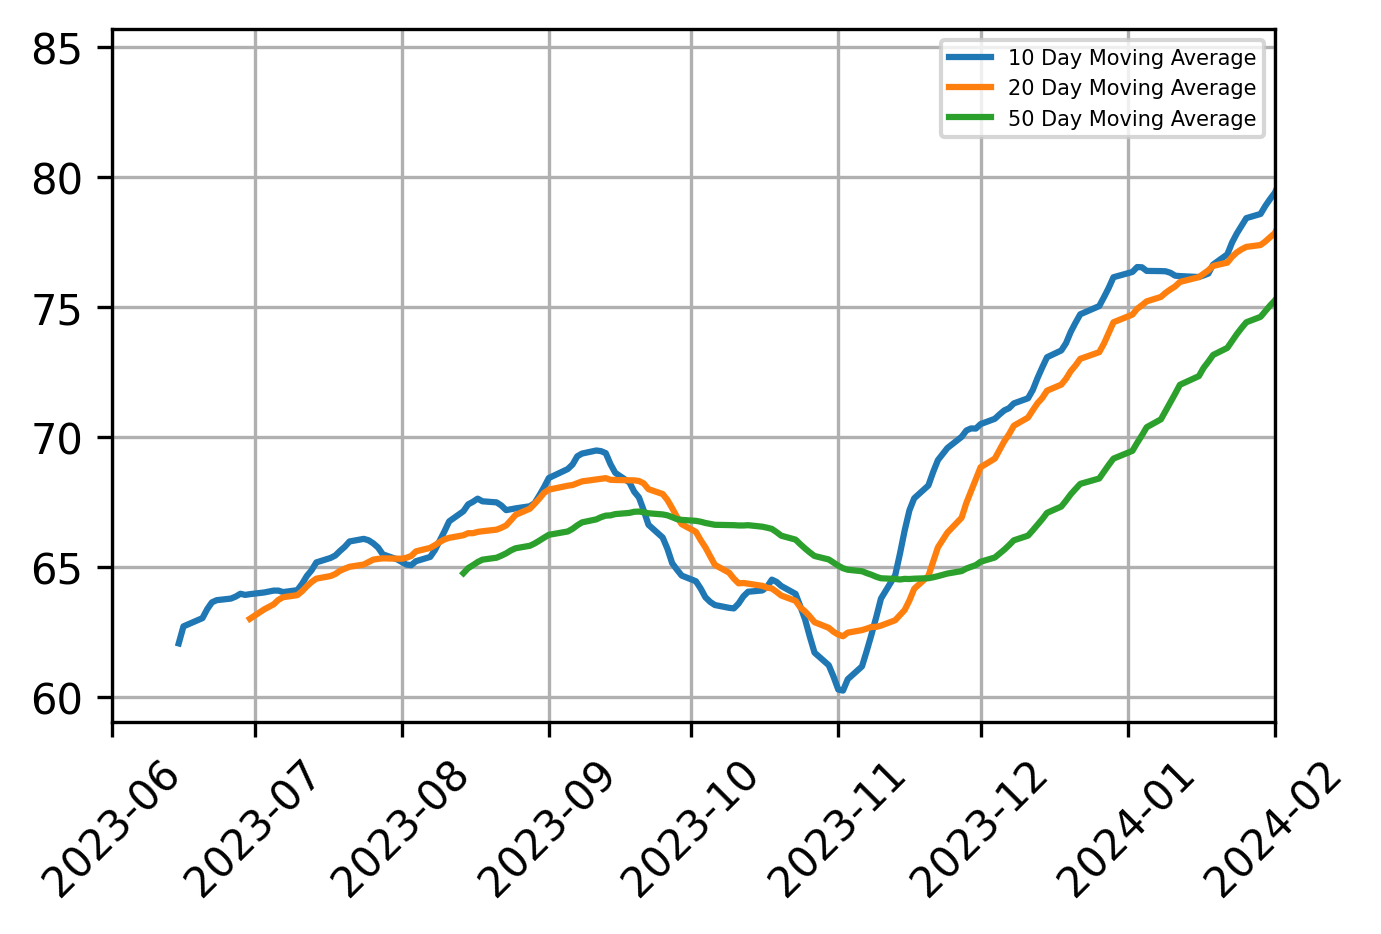

In [3]:
fig, ax = plt.subplots(figsize = (5,3), dpi = 300)

#ax.plot(df['100 MA'], label = "100 Day Moving Average")
#ax.plot(df['50 MA'], label = "50 Day Moving Average")
#ax.plot(df['Date'], df['Daily Change (ln)'], label = "Daily Change")
#ax.plot(df['Date'], df['5 MA'], label = "5 Day Moving Average")
ax.plot(df['Date'], df['10 MA'], label = "10 Day Moving Average")
ax.plot(df['Date'], df['20 MA'], label = "20 Day Moving Average")
ax.plot(df['Date'], df['50 MA'], label = "50 Day Moving Average")
ax.grid(True)
ax.legend(fontsize = 5)
plt.xticks(rotation = 45)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
months_fmt = mdates.DateFormatter('%M')

ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(months_fmt)
#ax.xaxis.set_minor_locator(months)

datemin = np.datetime64(df['Date'][0], 'M')
datemax = np.datetime64(df['Date'][nrows - 1], 'M')# + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
#ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


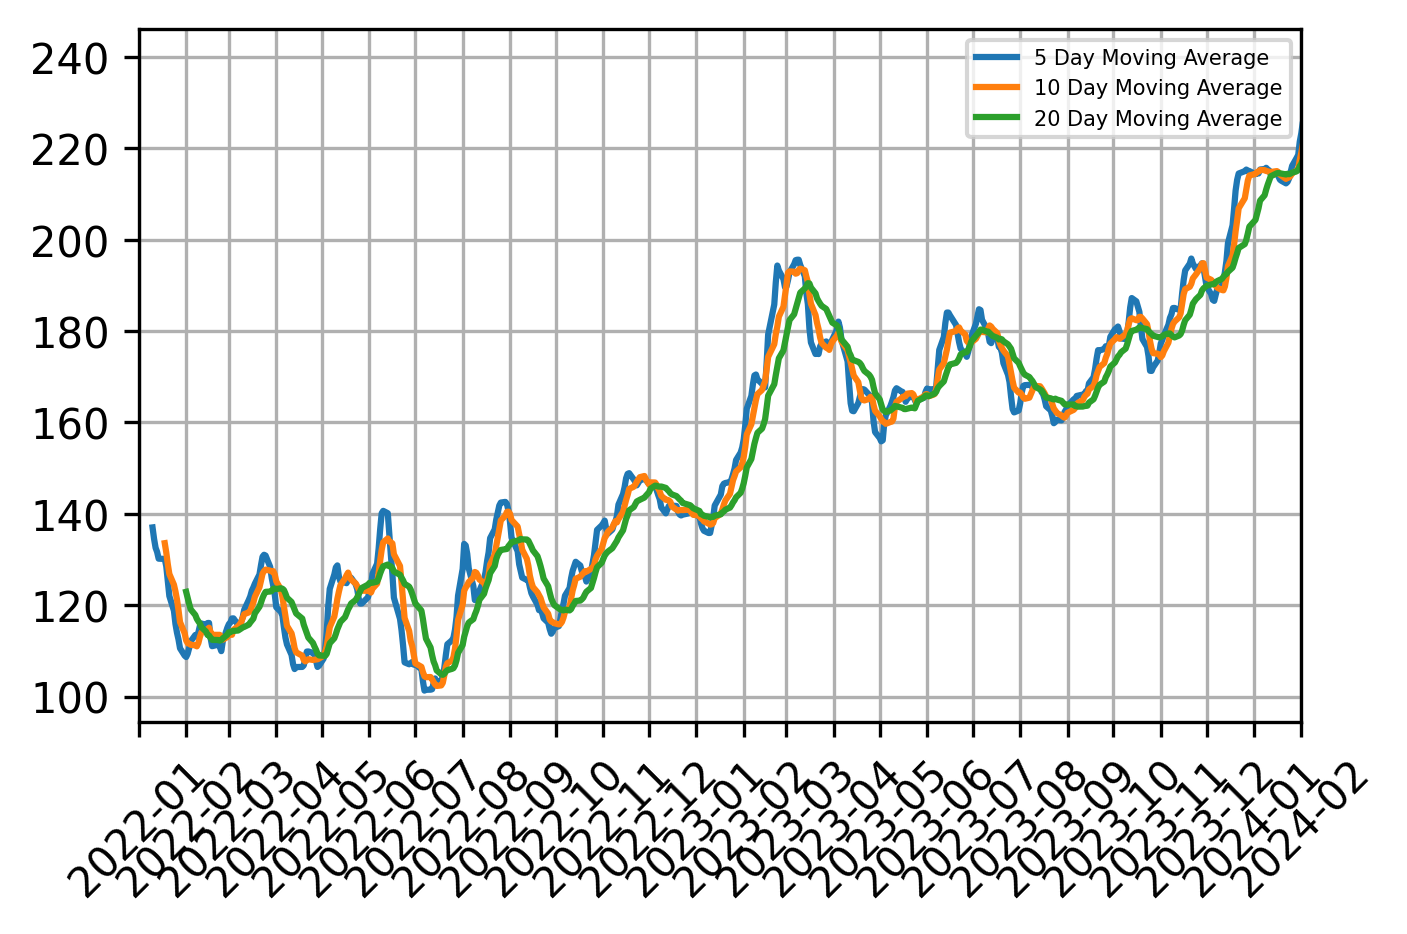

In [4]:
df = yf.download('WIRE',
start='2022-01-01',
end='2024-02-16',
progress = False)

df.reset_index(inplace=True)

nrows = df.shape[0]

null_column = np.zeros(nrows)
null_column[:] = np.NaN
df['5 MA'] = null_column
df['10 MA'] = null_column
df['20 MA'] = null_column
df['50 MA'] = null_column
df['100 MA'] = null_column
df['Daily Change (ln)'] = null_column

for i in range(5, nrows):
    df.loc[i,'5 MA'] = np.mean(df.iloc[i-5:i:, 4])

for i in range(10, nrows):
    df.loc[i,'10 MA'] = np.mean(df.iloc[i-10:i:, 4])

for i in range(20, nrows):
    df.loc[i,'20 MA'] = np.mean(df.iloc[i-20:i:, 4])

for i in range(50, nrows):
    df.loc[i, '50 MA'] = np.mean(df.iloc[i-50:i:, 4])
    
for i in range(100, nrows):
    df.loc[i, '100 MA'] = np.mean(df.iloc[i-100:i:, 4])
    
for i in range(1, nrows):
    df.loc[i, 'Daily Change (ln)'] = np.log(df.iloc[i,4]/df.iloc[(i-1),4])

fig, ax = plt.subplots(figsize = (5,3), dpi = 300)

#ax.plot(df['100 MA'], label = "100 Day Moving Average")
#ax.plot(df['50 MA'], label = "50 Day Moving Average")
#ax.plot(df['Date'], df['Daily Change (ln)'], label = "Daily Change")
ax.plot(df['Date'], df['5 MA'], label = "5 Day Moving Average")
ax.plot(df['Date'], df['10 MA'], label = "10 Day Moving Average")
ax.plot(df['Date'], df['20 MA'], label = "20 Day Moving Average")
ax.grid(True)
ax.legend(fontsize = 5)
plt.xticks(rotation = 45)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
months_fmt = mdates.DateFormatter('%M')

ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(months_fmt)
#ax.xaxis.set_minor_locator(months)

datemin = np.datetime64(df['Date'][0], 'M')
datemax = np.datetime64(df['Date'][nrows - 1], 'M')# + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
#ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.

In [5]:
def stock_data(ticker, start_date, end_date):

    df = yf.download(ticker, start = start_date, end = end_date, progress = False)
    df.reset_index(inplace=True)
    nrows = df.shape[0]
    null_column = np.zeros(nrows)
    null_column[:] = np.NaN
    df['5 MA'] = null_column
    df['10 MA'] = null_column
    df['20 MA'] = null_column
    df['50 MA'] = null_column
    df['100 MA'] = null_column
    df['Daily Change (ln)'] = null_column

    for i in range(5, nrows):
        df.loc[i,'5 MA'] = np.mean(df.iloc[i-5:i:, 4])

    for i in range(10, nrows):
        df.loc[i,'10 MA'] = np.mean(df.iloc[i-10:i:, 4])

    for i in range(20, nrows):
        df.loc[i,'20 MA'] = np.mean(df.iloc[i-20:i:, 4])

    for i in range(50, nrows):
        df.loc[i, '50 MA'] = np.mean(df.iloc[i-50:i:, 4])
    
    for i in range(100, nrows):
        df.loc[i, '100 MA'] = np.mean(df.iloc[i-100:i:, 4])
    
    for i in range(1, nrows):
        df.loc[i, 'Daily Change (ln)'] = np.log(df.iloc[i,4]/df.iloc[(i-1),4])
    return df


df_wire = stock_data('WIRE', start_date = '2022-01-01', end_date = '2024-02-16')

df_ir = stock_data('WIRE', start_date = '2022-01-01', end_date = '2024-02-16')

df_ssd = stock_data('SSD', start_date = '2022-01-01', end_date = '2024-02-16')

df_wire.head(20)

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Date,Open,High,Low,Close,Adj Close,Volume,5 MA,10 MA,20 MA,50 MA,100 MA,Daily Change (ln)
0,2022-01-03,144.369995,145.839996,140.330002,140.990005,140.813751,178300,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-01-04,141.339996,145.149994,141.339996,141.710007,141.532867,163400,NaN,NaN,NaN,NaN,NaN,0.005094
2,2022-01-05,141.960007,142.130005,136.509995,136.539993,136.369308,197400,NaN,NaN,NaN,NaN,NaN,-0.037165
3,2022-01-06,136.309998,138.149994,133.779999,136.899994,136.748886,221500,NaN,NaN,NaN,NaN,NaN,0.002633
4,2022-01-07,138.000000,138.100006,128.759995,128.970001,128.827637,354400,NaN,NaN,NaN,NaN,NaN,-0.059671
5,2022-01-10,127.339996,128.649994,125.019997,128.509995,128.368149,505200,137.022000,NaN,NaN,NaN,NaN,-0.003573
6,2022-01-11,129.169998,132.059998,126.110001,131.889999,131.744400,209200,134.525998,NaN,NaN,NaN,NaN,0.025962
7,2022-01-12,133.270004,135.110001,131.119995,131.949997,131.804352,263800,132.561996,NaN,NaN,NaN,NaN,0.000455
8,2022-01-13,133.369995,135.149994,128.860001,129.580002,129.436966,126600,131.643997,NaN,NaN,NaN,NaN,-0.018125
9,2022-01-14,128.449997,129.179993,125.870003,128.690002,128.547943,176000,130.179999,NaN,NaN,NaN,NaN,-0.006892


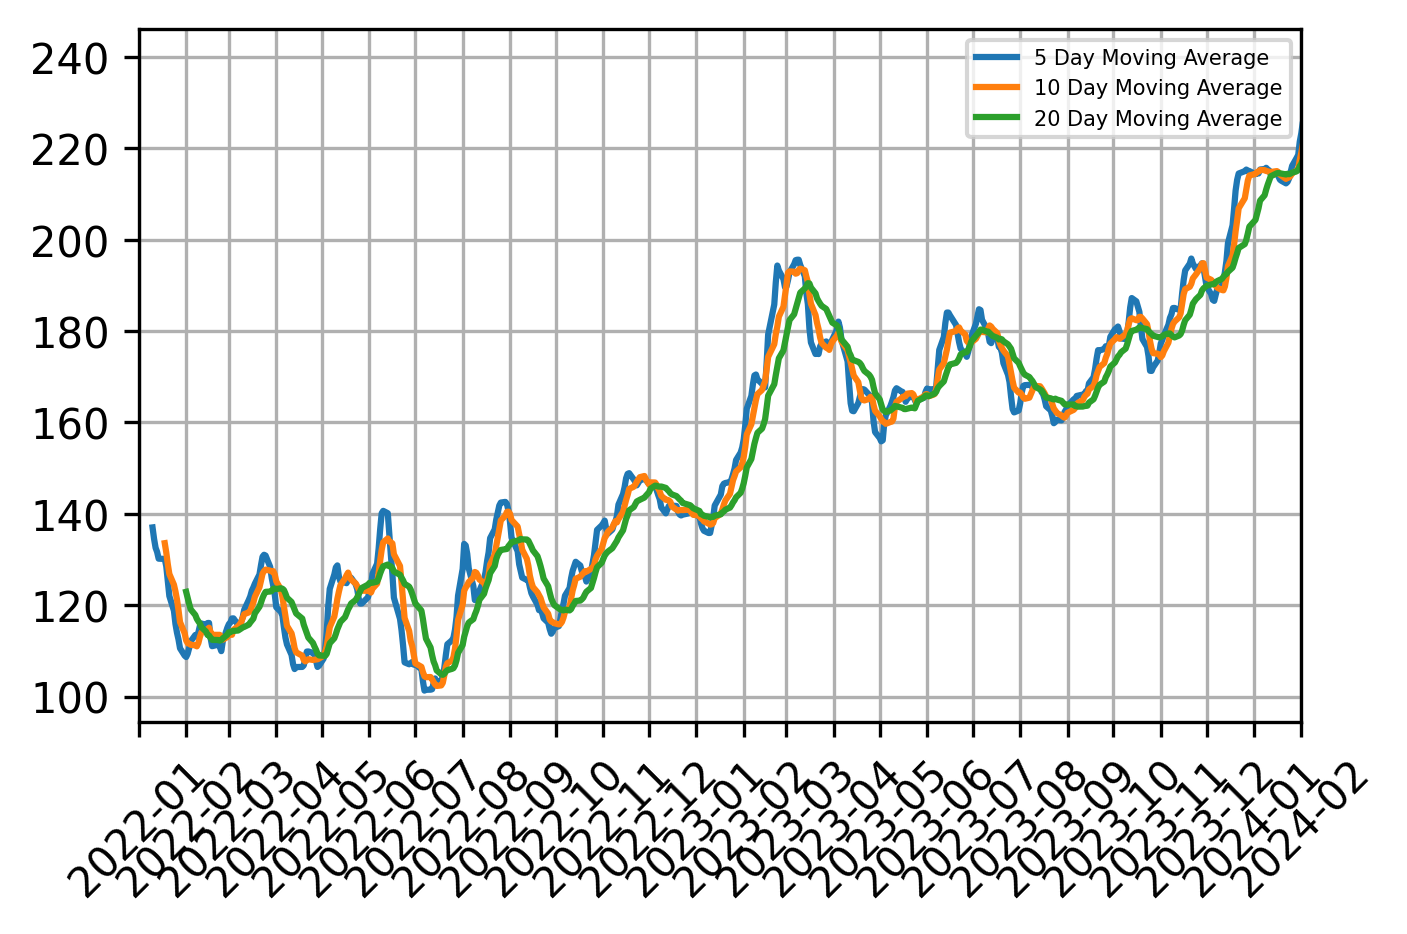

In [6]:
df = df_wire

nrows = df.shape[0]

fig, ax = plt.subplots(figsize = (5,3), dpi = 300)

#ax.plot(df['100 MA'], label = "100 Day Moving Average")
#ax.plot(df['50 MA'], label = "50 Day Moving Average")
#ax.plot(df['Date'], df['Daily Change (ln)'], label = "Daily Change")
ax.plot(df['Date'], df['5 MA'], label = "5 Day Moving Average")
ax.plot(df['Date'], df['10 MA'], label = "10 Day Moving Average")
ax.plot(df['Date'], df['20 MA'], label = "20 Day Moving Average")
ax.grid(True)
ax.legend(fontsize = 5)
plt.xticks(rotation = 45)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
months_fmt = mdates.DateFormatter('%M')

ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(months_fmt)
#ax.xaxis.set_minor_locator(months)

datemin = np.datetime64(df['Date'][0], 'M')
datemax = np.datetime64(df['Date'][nrows - 1], 'M')# + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
#ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.

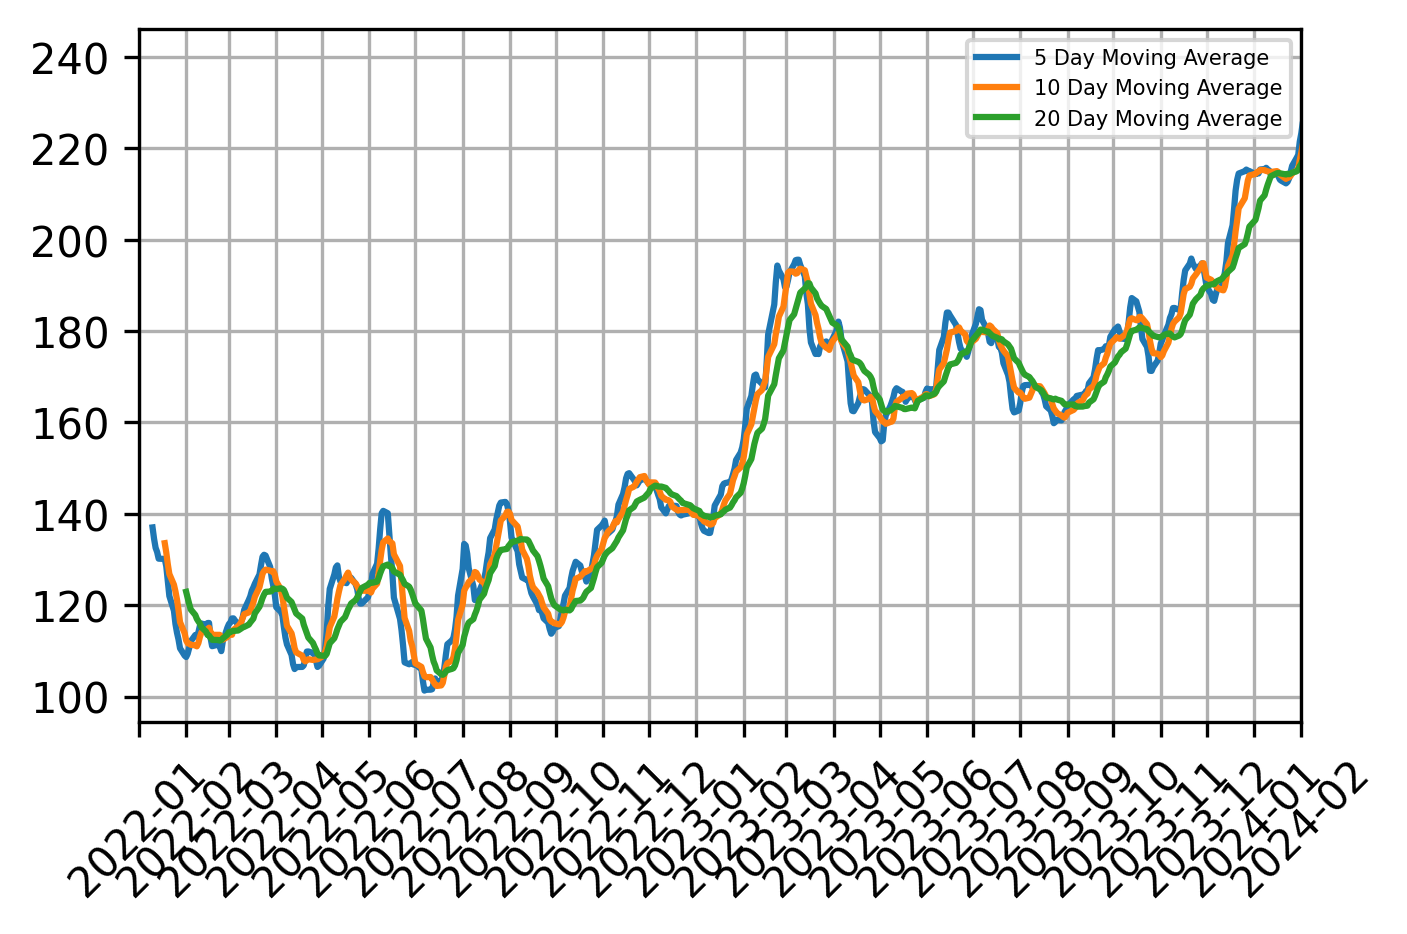

In [7]:
df = df_ir

nrows = df.shape[0]

fig, ax = plt.subplots(figsize = (5,3), dpi = 300)

#ax.plot(df['100 MA'], label = "100 Day Moving Average")
#ax.plot(df['50 MA'], label = "50 Day Moving Average")
#ax.plot(df['Date'], df['Daily Change (ln)'], label = "Daily Change")
ax.plot(df['Date'], df['5 MA'], label = "5 Day Moving Average")
ax.plot(df['Date'], df['10 MA'], label = "10 Day Moving Average")
ax.plot(df['Date'], df['20 MA'], label = "20 Day Moving Average")
ax.grid(True)
ax.legend(fontsize = 5)
plt.xticks(rotation = 45)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
months_fmt = mdates.DateFormatter('%M')

ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(months_fmt)
#ax.xaxis.set_minor_locator(months)

datemin = np.datetime64(df['Date'][0], 'M')
datemax = np.datetime64(df['Date'][nrows - 1], 'M')# + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
#ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.

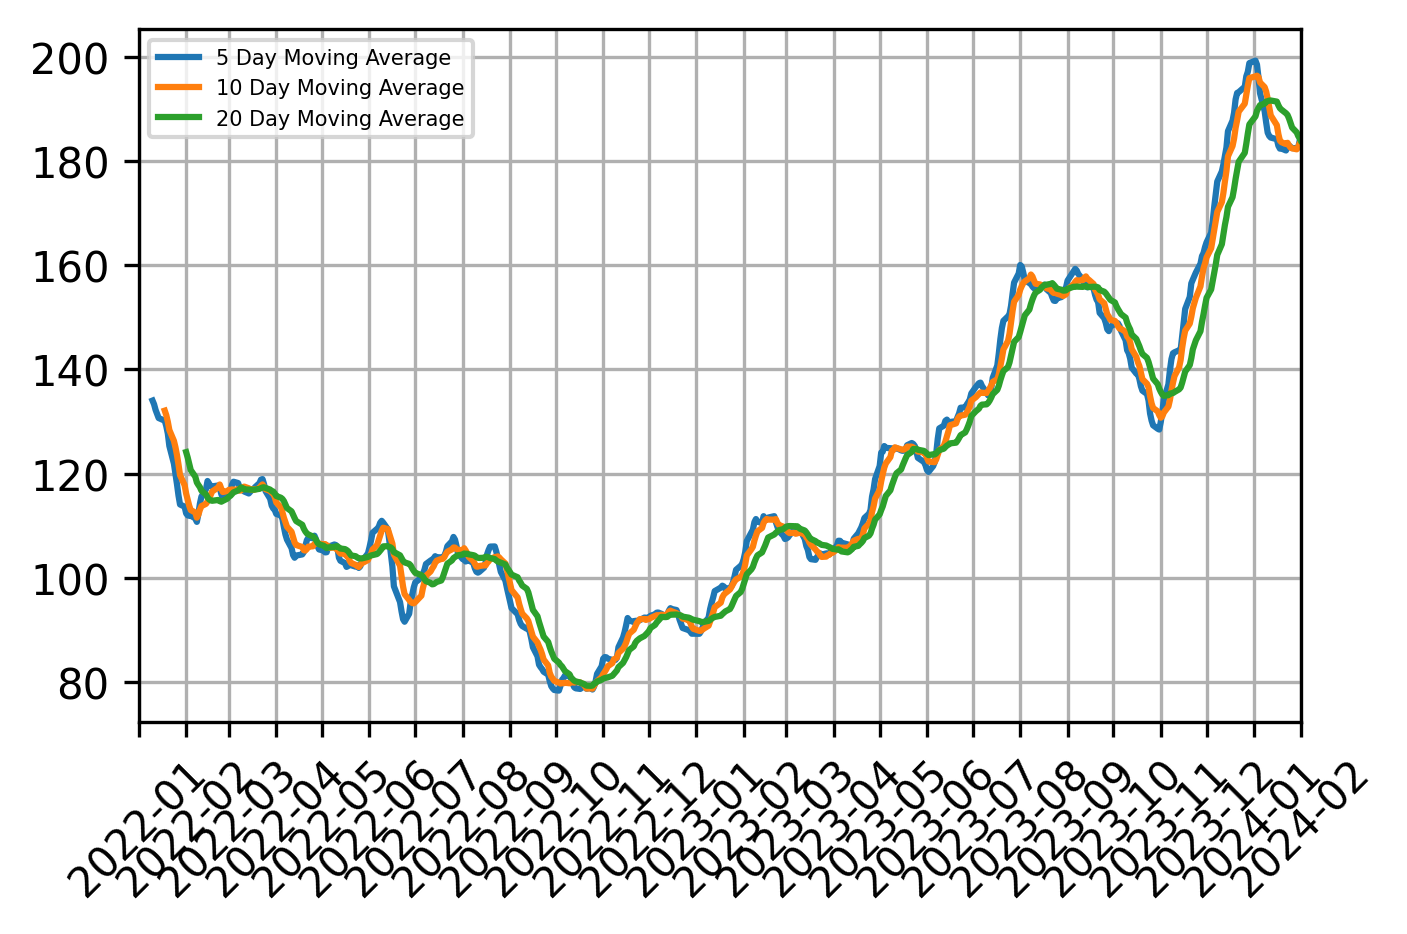

In [8]:
df = df_ssd

nrows = df.shape[0]

fig, ax = plt.subplots(figsize = (5,3), dpi = 300)

#ax.plot(df['100 MA'], label = "100 Day Moving Average")
#ax.plot(df['50 MA'], label = "50 Day Moving Average")
#ax.plot(df['Date'], df['Daily Change (ln)'], label = "Daily Change")
ax.plot(df['Date'], df['5 MA'], label = "5 Day Moving Average")
ax.plot(df['Date'], df['10 MA'], label = "10 Day Moving Average")
ax.plot(df['Date'], df['20 MA'], label = "20 Day Moving Average")
ax.grid(True)
ax.legend(fontsize = 5)
plt.xticks(rotation = 45)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
months_fmt = mdates.DateFormatter('%M')

ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(months_fmt)
#ax.xaxis.set_minor_locator(months)

datemin = np.datetime64(df['Date'][0], 'M')
datemax = np.datetime64(df['Date'][nrows - 1], 'M')# + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
#ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.

In [9]:
df_isrg = yf.download('ISRG', start='2022-01-01', end='2024-02-16', progress = False)
df_isrg.head()

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-01-03,358.649994,360.510010,353.130005,360.000000,360.000000,1573300
2022-01-04,360.000000,362.000000,352.570007,354.630005,354.630005,1310900
2022-01-05,352.489990,355.700012,341.649994,341.950012,341.950012,1804800
2022-01-06,339.880005,341.709991,333.380005,334.179993,334.179993,1701800
2022-01-07,330.940002,333.070007,323.230011,324.290009,324.290009,1746900


In [10]:
df_isrg['Close'].rolling(5).mean()

Date
2022-01-03           NaN
2022-01-04           NaN
2022-01-05           NaN
2022-01-06           NaN
2022-01-07    343.010004
                 ...    
2024-02-09    388.034003
2024-02-12    387.672003
2024-02-13    385.512006
2024-02-14    383.588007
2024-02-15    382.234009
Name: Close, Length: 533, dtype: float64

In [12]:
def stock_data2(ticker, start_date, end_date):

    df = yf.download(ticker, start = start_date, end = end_date, progress = False)
    df.reset_index(inplace=True)
    nrows = df.shape[0]
    df['5 MA'] = df['Adj Close'].rolling(5).mean()
    df['10 MA'] = df['Adj Close'].rolling(10).mean()
    df['20 MA'] = df['Adj Close'].rolling(20).mean()
    df['50 MA'] = df['Adj Close'].rolling(50).mean()
    df['100 MA'] = df['Adj Close'].rolling(100).mean()
    df['Daily Change (ln)'] = np.log(df['Adj Close']/df['Adj Close'].shift(1))
    df['Percent Return'] = df['Adj Close'].pct_change()

    return df


df_wire = stock_data2('WIRE', start_date = '2020-01-01', end_date = '2024-02-16')
df_wire.head()

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Date,Open,High,Low,Close,Adj Close,Volume,5 MA,10 MA,20 MA,50 MA,100 MA,Daily Change (ln),Percent Return
0,2020-01-02,58.060001,58.060001,56.959999,57.830002,57.616325,63600,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-03,57.049999,58.080002,56.849998,57.990002,57.775738,127400,NaN,NaN,NaN,NaN,NaN,0.002763,0.002767
2,2020-01-06,57.570000,57.799999,56.410000,56.770000,56.560238,78100,NaN,NaN,NaN,NaN,NaN,-0.021263,-0.021038
3,2020-01-07,56.509998,56.820000,56.049999,56.790001,56.580162,59300,NaN,NaN,NaN,NaN,NaN,0.000352,0.000352
4,2020-01-08,56.700001,57.090000,56.470001,56.849998,56.639942,71100,57.034481,NaN,NaN,NaN,NaN,0.001056,0.001057


In [192]:
df_wire['5 less 20'] = df_wire['5 MA'] < df_wire['20 MA'] 
df_wire['20 less 50'] = df_wire['20 MA'] < df_wire['50 MA']
df_wire['Buy'] = np.where(df_wire['5 less 20'] & df_wire['20 less 50'] == True, True, False)
df_wire['Owned'] = df_wire['Buy'] * 10

In [193]:
df_wire.loc[:, ['Owned', 'Buy']]

,Owned,Buy
0,0,False
1,0,False
2,0,False
3,0,False
4,0,False
...,...,...
1033,0,False
1034,0,False
1035,0,False
1036,0,False


In [14]:
df_wire['Cost'] = df_wire['Owned'] * df_wire['Close']

In [15]:
df_wire['Cost'].sum()

182285.5001449585

In [16]:
df_wire['Close'].values[-1] * df_wire['Owned'].sum()

411999.48944091797

In [17]:
df_ir = stock_data2('IR', start_date = '2020-01-01', end_date = '2024-02-16')
df_ir['5 less 20'] = df_ir['5 MA'] < df_ir['20 MA'] 
df_ir['20 less 50'] = df_ir['20 MA'] < df_ir['50 MA']
df_ir['Buy'] = np.where(df_ir['5 less 20'] & df_ir['20 less 50'] == True, True, False)
df_ir['Owned'] = df_ir['Buy'] * 10
df_ir['Cost'] = df_ir['Owned'] * df_ir['Close']
print([df_ir['Cost'].sum(), df_ir['Close'].values[-1] * df_ir['Owned'].sum()])

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


[85732.59983062744, 158022.00164794922]


In [18]:
df_ir = stock_data2('IR', start_date = '2020-01-01', end_date = '2024-02-16')
df_ir['5 less 20'] = df_ir['5 MA'] < df_ir['20 MA'] 
df_ir['20 less 50'] = df_ir['20 MA'] < df_ir['50 MA']
df_ir['Buy'] = np.where(df_ir['5 less 20'] & df_ir['20 less 50'] == True, True, False)
df_ir['Owned'] = df_ir['Buy'] * 10
df_ir['Cost'] = df_ir['Owned'] * df_ir['Close']
print([df_ir['Cost'].sum(), df_ir['Close'].values[-1] * df_ir['Owned'].sum()])

[85732.59983062744, 158022.00164794922]


/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [19]:
df_AAPL = stock_data2('AAPL', start_date = '2020-01-01', end_date = '2024-02-16')
df_AAPL['5 less 20'] = df_AAPL['5 MA'] < df_AAPL['20 MA'] 
df_AAPL['20 less 50'] = df_AAPL['20 MA'] < df_AAPL['50 MA']
df_AAPL['Buy'] = np.where(df_AAPL['5 less 20'] & df_AAPL['20 less 50'] == True, True, False)
df_AAPL['Owned'] = df_AAPL['Buy'] * 10
df_AAPL['Cost'] = df_AAPL['Owned'] * df_AAPL['Close']
print([df_AAPL['Cost'].sum(), df_AAPL['Close'].values[-1] * df_AAPL['Owned'].sum()])

[319386.4241409302, 413685.001373291]


/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [20]:
df_ISRG = stock_data2('ISRG', start_date = '2020-01-01', end_date = '2024-02-16')
df_ISRG['5 less 20'] = df_ISRG['5 MA'] < df_ISRG['20 MA'] 
df_ISRG['20 less 50'] = df_ISRG['20 MA'] < df_ISRG['50 MA']
df_ISRG['Buy'] = np.where(df_ISRG['5 less 20'] & df_ISRG['20 less 50'] == True, True, False)
df_ISRG['Bought'] = df_ISRG['Buy'] * 10
df_ISRG['Owned'] = df_ISRG['Bought'].cumsum()
df_ISRG['Cost'] = df_ISRG['Bought'] * df_ISRG['Close']
print([df_ISRG['Cost'].sum(), df_ISRG['Close'].values[-1] * df_ISRG['Bought'].sum()])

[592692.7671051025, 908606.3320922852]


/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [21]:
#df_ISRG = stock_data2('ISRG', start_date = '2020-01-01', end_date = '2024-02-16')
df_ISRG['5 more 20'] = df_ISRG['5 MA'] > df_ISRG['20 MA'] 
df_ISRG['20 more 50'] = df_ISRG['20 MA'] > df_ISRG['50 MA']
df_ISRG['Sell'] = np.where(df_ISRG['5 more 20'] & df_ISRG['20 more 50'] == True, True, False)
df_ISRG['Sold'] = np.where((df_ISRG['Owned'] != 0) & (df_ISRG['Sell'] == True), df_ISRG['Owned'], 0)
df_ISRG['Profit'] = df_ISRG['Sold'] * df_ISRG['Close']

In [22]:
df_ISRG.loc[df_ISRG['Buy'] == True,['Buy', 'Bought', 'Sell', 'Sold', 'Owned']]

,Buy,Bought,Sell,Sold,Owned
49,True,10,False,0,10
50,True,10,False,0,20
51,True,10,False,0,30
52,True,10,False,0,40
53,True,10,False,0,50
...,...,...,...,...,...
963,True,10,False,0,2350
964,True,10,False,0,2360
965,True,10,False,0,2370
966,True,10,False,0,2380


In [23]:
df_ISRG.loc[df_ISRG['Sell'] == True,['Buy', 'Bought', 'Sell', 'Sold', 'Owned']]

,Buy,Bought,Sell,Sold,Owned
82,False,0,True,110,110
83,False,0,True,110,110
85,False,0,True,110,110
87,False,0,True,110,110
88,False,0,True,110,110
...,...,...,...,...,...
1033,False,0,True,2390,2390
1034,False,0,True,2390,2390
1035,False,0,True,2390,2390
1036,False,0,True,2390,2390


In [24]:
df_ISRG['Profit'].sum()

128677584.90966797

In [25]:
df_ISRG['Bought'].sum()

2390

In [26]:
df_ISRG['Sold'].sum()

415660

In [27]:
(2390-1680)*df_ISRG['Close'].values[-1]

269920.7095336914

In [28]:
df_ISRG['Cost'].sum() - df_ISRG['Profit'].sum()

-128084892.14256287

In [29]:
df_ISRG.loc[df_ISRG['Sold'] != 0, ]

,Date,Open,High,Low,Close,Adj Close,Volume,5 MA,10 MA,20 MA,...,20 less 50,Buy,Bought,Owned,Cost,5 more 20,20 more 50,Sell,Sold,Profit
82,2020-04-30,172.500000,172.666672,169.479996,170.293335,170.293335,1686600,171.072000,171.090668,168.189001,...,False,False,0,110,0.0,True,True,True,110,18732.266846
83,2020-05-01,167.666672,168.990005,164.000000,166.286667,166.286667,2041500,170.000668,170.175002,168.708001,...,False,False,0,110,0.0,True,True,True,110,18291.533356
85,2020-05-05,169.916672,173.000000,168.190002,170.953339,170.953339,1518900,169.620670,170.171335,169.577001,...,False,False,0,110,0.0,True,True,True,110,18804.867249
87,2020-05-07,174.016663,178.846664,172.546661,178.646667,178.646667,2835000,170.766669,170.919334,170.365334,...,False,False,0,110,0.0,True,True,True,110,19651.133423
88,2020-05-08,180.973328,181.479996,178.246674,179.256668,179.256668,2776200,173.360669,171.680669,170.931668,...,False,False,0,110,0.0,True,True,True,110,19718.233490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,2024-02-09,387.459991,389.920013,383.049988,388.220001,388.220001,1233900,388.034003,384.244000,377.056500,...,False,False,0,2390,0.0,True,True,True,2390,927845.802917
1034,2024-02-12,386.089996,387.359985,381.070007,382.130005,382.130005,1569900,387.672003,384.541000,377.977501,...,False,False,0,2390,0.0,True,True,True,2390,913290.711670
1035,2024-02-13,375.000000,383.250000,371.000000,378.890015,378.890015,1705300,385.512006,384.701001,378.805502,...,False,False,0,2390,0.0,True,True,True,2390,905547.135010
1036,2024-02-14,380.089996,381.910004,378.000000,381.760010,381.760010,1147600,383.588007,385.055002,379.949503,...,False,False,0,2390,0.0,True,True,True,2390,912406.423340


In [30]:
df_ISRG['Bought'].cumsum()

0          0
1          0
2          0
3          0
4          0
        ... 
1033    2390
1034    2390
1035    2390
1036    2390
1037    2390
Name: Bought, Length: 1038, dtype: int64

In [31]:
np.sum(np.where((df_ISRG['Owned'] != 0) & (df_ISRG['Sell'] == True), df_ISRG['Bought'], 0))

0

In [32]:
df_ISRG = stock_data2('ISRG', start_date = '2020-01-01', end_date = '2024-02-16')

df_ISRG['5 less 20'] = df_ISRG['5 MA'] < df_ISRG['20 MA'] 
df_ISRG['20 less 50'] = df_ISRG['20 MA'] < df_ISRG['50 MA']
df_ISRG['5 more 20'] = df_ISRG['5 MA'] > df_ISRG['20 MA'] 
df_ISRG['20 more 50'] = df_ISRG['20 MA'] > df_ISRG['50 MA']
df_ISRG['50 more 100'] = df_ISRG['50 MA'] > df_ISRG['100 MA']

df_ISRG['Buy'] = np.where(df_ISRG['5 less 20'] & df_ISRG['20 less 50'] == True, True, False)
df_ISRG['Sell'] = np.where(df_ISRG['20 more 50'] & df_ISRG['50 more 100'] == True, True, False)
#df_ISRG['Buy/Sell Balance'] = df_ISRG['Buy'].cumsum() - df_ISRG['Sell'].cumsum()

nrows = df_ISRG.shape[0]
null_column = np.zeros(nrows)
#null_column[:] = np.NaN
df_ISRG['Shares'] = null_column
df_ISRG['Cash'] = null_column

df_ISRG.loc[df_ISRG['Sell'] == True,['Buy', 'Sell', 'Shares', 'Cash']]#, 'Buy/Sell Balance']]

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


,Buy,Sell,Shares,Cash
113,False,True,0.0,0.0
114,False,True,0.0,0.0
115,False,True,0.0,0.0
116,False,True,0.0,0.0
117,False,True,0.0,0.0
...,...,...,...,...
1033,False,True,0.0,0.0
1034,False,True,0.0,0.0
1035,False,True,0.0,0.0
1036,False,True,0.0,0.0


In [33]:
ISRG_shares = 0
ISRG_cash = 10000

for i in range(nrows):
    if df_ISRG.loc[i,'Buy'] == True and ISRG_cash > 0:
        ISRG_shares = ISRG_shares + 10
        ISRG_cash = ISRG_cash - df_ISRG.loc[i, 'Close'] * 10
    elif df_ISRG.loc[i,'Sell'] == True and ISRG_shares > 0:
        ISRG_cash = ISRG_cash + df_ISRG.loc[i, 'Close'] * ISRG_shares
        ISRG_shares = 0
        

In [34]:
print(ISRG_cash, ISRG_shares)

23048.969497680664 0


In [36]:
df_WIRE = stock_data2('WIRE', start_date = '2020-01-01', end_date = '2024-02-16')

df_WIRE['5 less 20'] = df_WIRE['5 MA'] < df_WIRE['20 MA'] 
df_WIRE['20 less 50'] = df_WIRE['20 MA'] < df_WIRE['50 MA']
df_WIRE['5 more 20'] = df_WIRE['5 MA'] > df_WIRE['20 MA'] 
df_WIRE['20 more 50'] = df_WIRE['20 MA'] > df_WIRE['50 MA']
df_WIRE['50 more 100'] = df_WIRE['50 MA'] > df_WIRE['100 MA']

df_WIRE['Buy'] = np.where(df_WIRE['5 less 20'] & df_WIRE['20 less 50'] == True, True, False)
df_WIRE['Sell'] = np.where(df_WIRE['20 more 50'] & df_WIRE['50 more 100'] == True, True, False)
#df_WIRE['Buy/Sell Balance'] = df_WIRE['Buy'].cumsum() - df_WIRE['Sell'].cumsum()

nrows = df_WIRE.shape[0]
null_column = np.zeros(nrows)
#null_column[:] = np.NaN
df_WIRE['Shares'] = null_column
df_WIRE['Cash'] = null_column

df_WIRE.loc[df_WIRE['Sell'] == True,['Buy', 'Sell', 'Shares', 'Cash']]#, 'Buy/Sell Balance']]

WIRE_shares = 0
WIRE_cash = 10000

for i in range(nrows):
    if df_WIRE.loc[i,'Buy'] == True and WIRE_cash > 0:
        WIRE_shares = WIRE_shares + 10
        WIRE_cash = WIRE_cash - df_WIRE.loc[i, 'Close'] * 10
    elif df_WIRE.loc[i,'Sell'] == True and WIRE_shares > 0:
        WIRE_cash = WIRE_cash + df_WIRE.loc[i, 'Close'] * WIRE_shares
        WIRE_shares = 0
        
print(WIRE_cash, WIRE_shares)

26665.50148010254 0


/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [37]:
df_IR = stock_data2('IR', start_date = '2020-01-01', end_date = '2024-02-16')

df_IR['5 less 20'] = df_IR['5 MA'] < df_IR['20 MA'] 
df_IR['20 less 50'] = df_IR['20 MA'] < df_IR['50 MA']
df_IR['5 more 20'] = df_IR['5 MA'] > df_IR['20 MA'] 
df_IR['20 more 50'] = df_IR['20 MA'] > df_IR['50 MA']
df_IR['50 more 100'] = df_IR['50 MA'] > df_IR['100 MA']

df_IR['Buy'] = np.where(df_IR['5 less 20'] & df_IR['20 less 50'] == True, True, False)
df_IR['Sell'] = np.where(df_IR['20 more 50'] & df_IR['50 more 100'] == True, True, False)
#df_IR['Buy/Sell Balance'] = df_IR['Buy'].cumsum() - df_IR['Sell'].cumsum()

nrows = df_IR.shape[0]
null_column = np.zeros(nrows)
#null_column[:] = np.NaN
df_IR['Shares'] = null_column
df_IR['Cash'] = null_column

df_IR.loc[df_IR['Sell'] == True,['Buy', 'Sell', 'Shares', 'Cash']]#, 'Buy/Sell Balance']]

IR_shares = 0
IR_cash = 10000

for i in range(nrows):
    if df_IR.loc[i,'Buy'] == True and IR_cash > 0:
        IR_shares = IR_shares + 10
        IR_cash = IR_cash - df_IR.loc[i, 'Close'] * 10
    elif df_IR.loc[i,'Sell'] == True and IR_shares > 0:
        IR_cash = IR_cash + df_IR.loc[i, 'Close'] * IR_shares
        IR_shares = 0
        
print(IR_cash, IR_shares)

14478.499984741211 0


/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [38]:
df_ANET = stock_data2('ANET', start_date = '2020-01-01', end_date = '2024-02-16')

df_ANET['5 less 20'] = df_ANET['5 MA'] < df_ANET['20 MA'] 
df_ANET['20 less 50'] = df_ANET['20 MA'] < df_ANET['50 MA']
df_ANET['5 more 20'] = df_ANET['5 MA'] > df_ANET['20 MA'] 
df_ANET['20 more 50'] = df_ANET['20 MA'] > df_ANET['50 MA']
df_ANET['50 more 100'] = df_ANET['50 MA'] > df_ANET['100 MA']

df_ANET['Buy'] = np.where(df_ANET['5 less 20'] & df_ANET['20 less 50'] == True, True, False)
df_ANET['Sell'] = np.where(df_ANET['20 more 50'] & df_ANET['50 more 100'] == True, True, False)
#df_ANET['Buy/Sell Balance'] = df_ANET['Buy'].cumsum() - df_ANET['Sell'].cumsum()

nrows = df_ANET.shape[0]
null_column = np.zeros(nrows)
#null_column[:] = np.NaN
df_ANET['Shares'] = null_column
df_ANET['Cash'] = null_column

df_ANET.loc[df_ANET['Sell'] == True,['Buy', 'Sell', 'Shares', 'Cash']]#, 'Buy/Sell Balance']]

ANET_shares = 0
ANET_cash = 10000

for i in range(nrows):
    if df_ANET.loc[i,'Buy'] == True and ANET_cash > 0:
        ANET_shares = ANET_shares + 10
        ANET_cash = ANET_cash - df_ANET.loc[i, 'Close'] * 10
    elif df_ANET.loc[i,'Sell'] == True and ANET_shares > 0:
        ANET_cash = ANET_cash + df_ANET.loc[i, 'Close'] * ANET_shares
        ANET_shares = 0
        
print(ANET_cash, ANET_shares)

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


28132.351684570312 0


In [39]:
df_AMAT = stock_data2('AMAT', start_date = '2020-01-01', end_date = '2024-02-16')

df_AMAT['5 less 20'] = df_AMAT['5 MA'] < df_AMAT['20 MA'] 
df_AMAT['20 less 50'] = df_AMAT['20 MA'] < df_AMAT['50 MA']
df_AMAT['5 more 20'] = df_AMAT['5 MA'] > df_AMAT['20 MA'] 
df_AMAT['20 more 50'] = df_AMAT['20 MA'] > df_AMAT['50 MA']
df_AMAT['50 more 100'] = df_AMAT['50 MA'] > df_AMAT['100 MA']

df_AMAT['Buy'] = np.where(df_AMAT['5 less 20'] & df_AMAT['20 less 50'] == True, True, False)
df_AMAT['Sell'] = np.where(df_AMAT['20 more 50'] & df_AMAT['50 more 100'] == True, True, False)
#df_AMAT['Buy/Sell Balance'] = df_AMAT['Buy'].cumsum() - df_AMAT['Sell'].cumsum()

nrows = df_AMAT.shape[0]
null_column = np.zeros(nrows)
#null_column[:] = np.NaN
df_AMAT['Shares'] = null_column
df_AMAT['Cash'] = null_column

df_AMAT.loc[df_AMAT['Sell'] == True,['Buy', 'Sell', 'Shares', 'Cash']]#, 'Buy/Sell Balance']]

AMAT_shares = 0
AMAT_cash = 10000

for i in range(nrows):
    if df_AMAT.loc[i,'Buy'] == True and AMAT_cash > 0:
        AMAT_shares = AMAT_shares + 10
        AMAT_cash = AMAT_cash - df_AMAT.loc[i, 'Close'] * 10
    elif df_AMAT.loc[i,'Sell'] == True and AMAT_shares > 0:
        AMAT_cash = AMAT_cash + df_AMAT.loc[i, 'Close'] * AMAT_shares
        AMAT_shares = 0
        
print(AMAT_cash, AMAT_shares)

17444.70111846924 0


/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [40]:
df_AMAT = stock_data2('AMAT', start_date = '2020-01-01', end_date = '2024-02-16')

df_AMAT['5 less 20'] = df_AMAT['5 MA'] < df_AMAT['20 MA'] 
df_AMAT['20 less 50'] = df_AMAT['20 MA'] < df_AMAT['50 MA']
df_AMAT['5 more 20'] = df_AMAT['5 MA'] > df_AMAT['20 MA'] 
df_AMAT['20 more 50'] = df_AMAT['20 MA'] > df_AMAT['50 MA']
df_AMAT['50 more 100'] = df_AMAT['50 MA'] > df_AMAT['100 MA']

df_AMAT['Buy'] = np.where(df_AMAT['5 less 20'] & df_AMAT['20 less 50'] == True, True, False)
df_AMAT['Sell'] = np.where(df_AMAT['20 more 50'] & df_AMAT['50 more 100'] == True, True, False)
#df_AMAT['Buy/Sell Balance'] = df_AMAT['Buy'].cumsum() - df_AMAT['Sell'].cumsum()

nrows = df_AMAT.shape[0]
null_column = np.zeros(nrows)
#null_column[:] = np.NaN
df_AMAT['Shares'] = null_column
df_AMAT['Cash'] = null_column

df_AMAT.loc[df_AMAT['Sell'] == True,['Buy', 'Sell', 'Shares', 'Cash']]#, 'Buy/Sell Balance']]

AMAT_shares = 0
AMAT_cash = 10000
AMAT_expense = 0

for i in range(nrows):
    if df_AMAT.loc[i,'Buy'] == True:
        AMAT_shares = AMAT_shares + 10
        AMAT_expense = AMAT_expense + 10 * df_AMAT.loc[i,'Close']

AMAT_cash = AMAT_shares*df_AMAT['Close'].values[-1] 
print(AMAT_cash, AMAT_shares, AMAT_expense)

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


379073.20739746094 2020 208447.8001022339


In [41]:
df_BIIB = stock_data2('BIIB', start_date = '2020-01-01', end_date = '2024-02-16')

df_BIIB['5 less 20'] = df_BIIB['5 MA'] < df_BIIB['20 MA'] 
df_BIIB['20 less 50'] = df_BIIB['20 MA'] < df_BIIB['50 MA']
df_BIIB['5 more 20'] = df_BIIB['5 MA'] > df_BIIB['20 MA'] 
df_BIIB['20 more 50'] = df_BIIB['20 MA'] > df_BIIB['50 MA']
df_BIIB['50 more 100'] = df_BIIB['50 MA'] > df_BIIB['100 MA']

df_BIIB['Buy'] = np.where(df_BIIB['5 less 20'] & df_BIIB['20 less 50'] == True, True, False)
df_BIIB['Sell'] = np.where(df_BIIB['20 more 50'] & df_BIIB['50 more 100'] == True, True, False)
#df_BIIB['Buy/Sell Balance'] = df_BIIB['Buy'].cumsum() - df_BIIB['Sell'].cumsum()

nrows = df_BIIB.shape[0]
null_column = np.zeros(nrows)
#null_column[:] = np.NaN
df_BIIB['Shares'] = null_column
df_BIIB['Cash'] = null_column

df_BIIB.loc[df_BIIB['Sell'] == True,['Buy', 'Sell', 'Shares', 'Cash']]#, 'Buy/Sell Balance']]

BIIB_shares = 0
BIIB_cash = 10000
BIIB_expense = 0

for i in range(nrows):
    if df_BIIB.loc[i,'Buy'] == True:
        BIIB_shares = BIIB_shares + 10
        BIIB_expense = BIIB_expense + 10 * df_BIIB.loc[i,'Close']

BIIB_cash = BIIB_shares*df_BIIB['Close'].values[-1] 
print(BIIB_cash, BIIB_shares, BIIB_expense)

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


846496.5231323242 3790 960648.4997558594


/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


8082.7497482299805 75 5969.650077819824
       Buy  Sell
247  False  True
248  False  True
249  False  True
250  False  True
251  False  True


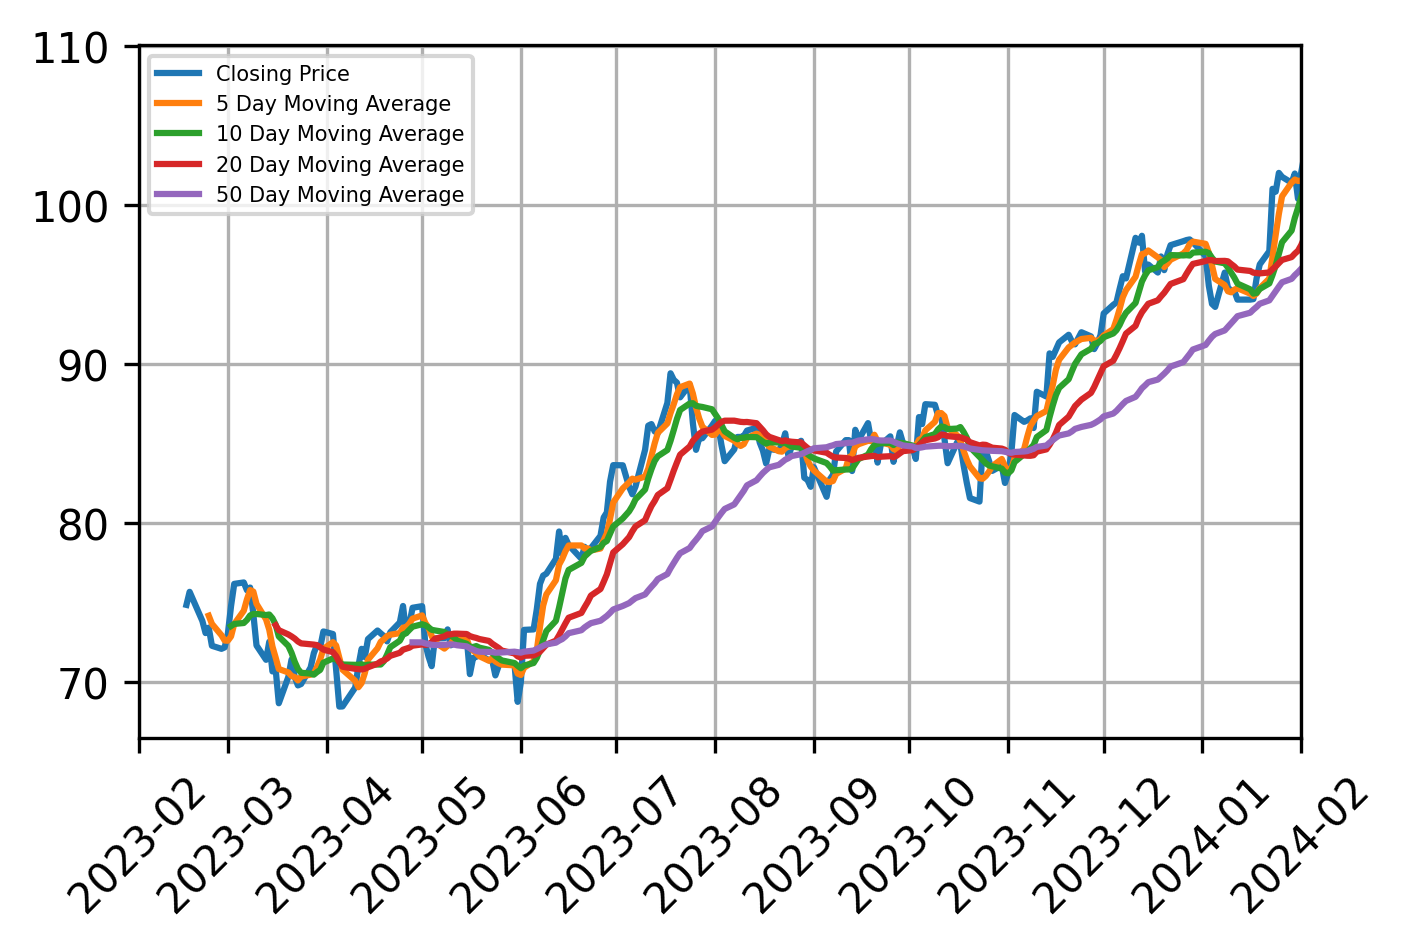

In [42]:
ticker = 'PCAR'

df_ticker = stock_data2(ticker, start_date = '2023-02-16', end_date = '2024-02-20')

df_ticker['5 less 20'] = df_ticker['5 MA'] < df_ticker['20 MA'] 
df_ticker['20 less 50'] = df_ticker['20 MA'] < df_ticker['50 MA']
df_ticker['5 more 20'] = df_ticker['5 MA'] > df_ticker['20 MA'] 
df_ticker['20 more 50'] = df_ticker['20 MA'] > df_ticker['50 MA']
df_ticker['50 more 100'] = df_ticker['50 MA'] > df_ticker['100 MA']

df_ticker['Buy'] = np.where(df_ticker['5 less 20'] & df_ticker['20 less 50'] == True, True, False)
df_ticker['Sell'] = np.where(df_ticker['20 more 50'] & df_ticker['50 more 100'] == True, True, False)
#df_ticker['Buy/Sell Balance'] = df_ticker['Buy'].cumsum() - df_ticker['Sell'].cumsum()

nrows = df_ticker.shape[0]
null_column = np.zeros(nrows)
#null_column[:] = np.NaN
df_ticker['Shares'] = null_column
df_ticker['Cash'] = null_column

df_ticker.loc[df_ticker['Sell'] == True,['Buy', 'Sell', 'Shares', 'Cash']]#, 'Buy/Sell Balance']]

ticker_shares = 0
ticker_cash = 10000
ticker_expense = 0

for i in range(nrows):
    if df_ticker.loc[i,'Buy'] == True:
        ticker_shares = ticker_shares + 5
        ticker_expense = ticker_expense + 5 * df_ticker.loc[i,'Close']

ticker_cash = ticker_shares*df_ticker['Close'].values[-1] 
print(ticker_cash, ticker_shares, ticker_expense)
print(df_ticker.loc[:,['Buy', 'Sell']].tail(5))


df = df_ticker

nrows = df.shape[0]

fig, ax = plt.subplots(figsize = (5,3), dpi = 300)

#ax.plot(df['100 MA'], label = "100 Day Moving Average")
#ax.plot(df['50 MA'], label = "50 Day Moving Average")
#ax.plot(df['Date'], df['Daily Change (ln)'], label = "Daily Change")
ax.plot(df['Date'], df['Close'], label = "Closing Price")
ax.plot(df['Date'], df['5 MA'], label = "5 Day Moving Average")
ax.plot(df['Date'], df['10 MA'], label = "10 Day Moving Average")
ax.plot(df['Date'], df['20 MA'], label = "20 Day Moving Average")
ax.plot(df['Date'], df['50 MA'], label = "50 Day Moving Average")
ax.grid(True)
ax.legend(fontsize = 5)
plt.xticks(rotation = 45)

years = mdates.YearLocator()   # every year
months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
months_fmt = mdates.DateFormatter('%M')

ax.xaxis.set_major_locator(months)
#ax.xaxis.set_major_formatter(months_fmt)
#ax.xaxis.set_minor_locator(months)

datemin = np.datetime64(df['Date'][0], 'M')
datemax = np.datetime64(df['Date'][nrows - 1], 'M')# + np.timedelta64(1, 'Y')
ax.set_xlim(datemin, datemax)

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
#ax.format_ydata = lambda x: '$%1.2f' % x  # format the price.

In [43]:
datemin

numpy.datetime64('2023-02')

In [44]:
df['Date'][0]

Timestamp('2023-02-16 00:00:00')

In [45]:
np.datetime64('2024-01-16')

numpy.datetime64('2024-01-16')

In [46]:
df_IR = stock_data2('IR', start_date = '2023-02-16', end_date = '2024-02-21')
df_PCAR = stock_data2('PCAR', start_date = '2023-02-16', end_date = '2024-02-21')
df_WIRE = stock_data2('WIRE', start_date = '2023-02-16', end_date = '2024-02-21')
df_WTS = stock_data2('WTS', start_date = '2023-02-16', end_date = '2024-02-21')
df_ANET = stock_data2('ANET', start_date = '2023-02-16', end_date = '2024-02-21')

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarnin

In [47]:
var_IR = np.cov(df_IR['Close'], df_PCAR['Close']).flatten()[0]
cov_IR_PCAR = np.cov(df_IR['Close'], df_PCAR['Close']).flatten()[1]
var_PCAR  = np.cov(df_IR['Close'], df_PCAR['Close']).flatten()[3]
var_ANET = np.cov(df_ANET['Close'], df_WIRE['Close']).flatten()[0]
cov_ANET_WIRE = np.cov(df_ANET['Close'], df_WIRE['Close']).flatten()[1]
var_WIRE  = np.cov(df_ANET['Close'], df_WIRE['Close']).flatten()[3]
var_WTS = np.cov(df_WTS['Close'], df_IR['Close']).flatten()[0]
cov_WTS_IR = np.cov(df_WTS['Close'], df_IR['Close']).flatten()[1]
var_IR  = np.cov(df_WTS['Close'], df_IR['Close']).flatten()[3]

In [48]:
stock_list = ['IR', 'WTS', 'WIRE', 'PCAR', 'ANET']

for i in range(len(stock_list)):
    df_temp = stock_data2(stock_list[i], start_date = '2023-02-16', end_date = '2024-02-21')
    print([np.sum(df_temp['Daily Change (ln)']), np.var(df_temp['Daily Change (ln)'])])

[0.41304505229413047, 0.00023049534438027765]
[0.11545781105149397, 0.0002584748873245075]
[0.10232872000609325, 0.0005277824724340064]
[0.3609000087773607, 0.0001840719760982198]
[0.6056095066854021, 0.0007959033061022718]


/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarnin

In [49]:
np.cov(df_IR['Close'], df_PCAR['Close'])

array([[66.57114744, 77.80622534],
       [77.80622534, 99.32490213]])

In [60]:
stock_list = ['RKLB', 'LLAP']

df = yf.download(stock_list,
start='2023-06-01',
end='2024-02-16',
progress = False)

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


In [61]:
df['Adj Close'].head()

Ticker,LLAP,RKLB
Date,,
2023-06-01,1.27,4.74
2023-06-02,1.28,4.90
2023-06-05,1.27,4.90
2023-06-06,1.27,5.18
2023-06-07,1.36,5.13


In [62]:
np.cov(df['Adj Close'])

array([[6.02, 6.28, 6.3 , ..., 6.23, 6.8 , 6.84],
       [6.28, 6.55, 6.57, ..., 6.5 , 7.09, 7.14],
       [6.3 , 6.57, 6.59, ..., 6.52, 7.11, 7.15],
       ...,
       [6.23, 6.5 , 6.52, ..., 6.45, 7.03, 7.08],
       [6.8 , 7.09, 7.11, ..., 7.03, 7.67, 7.72],
       [6.84, 7.14, 7.15, ..., 7.08, 7.72, 7.77]])

In [63]:
stock_returns = np.log(df['Adj Close']/df['Adj Close'].shift(1))
stock_returns.mean()

Ticker
LLAP   -0.001643
RKLB    0.000175
dtype: float64

In [70]:
print(stock_returns.head())
np.cov(stock_returns.dropna)

Ticker          LLAP      RKLB
Date                          
2023-06-01       NaN       NaN
2023-06-02  0.007843  0.033198
2023-06-05 -0.007843  0.000000
2023-06-06  0.000000  0.055570
2023-06-07  0.068468 -0.009699


TypeError: unsupported operand type(s) for /: 'method' and 'int'

In [39]:
stock_returns.dropna()

Ticker,LLAP,RKLB
Date,,
2021-04-27,0.000000,-0.001871
2021-04-28,0.000000,-0.015095
2021-04-29,0.006085,-0.002856
2021-04-30,0.000000,-0.002864
2021-05-03,0.000000,0.000956
...,...,...
2024-02-09,0.076356,0.009259
2024-02-12,0.006466,0.083934
2024-02-13,-0.092200,-0.061154


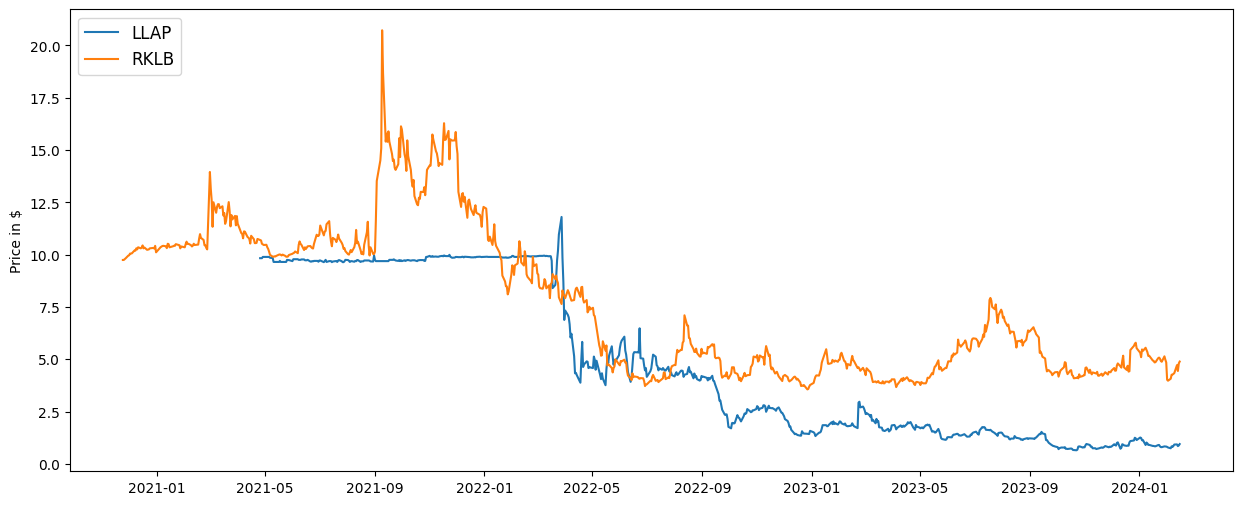

In [44]:
df1 = df['Adj Close']

plt.figure(figsize=(15, 6))
for i in range(df1.shape[1]):
    plt.plot(df1.iloc[:,i], label=df1.columns.values[i])
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Price in $')
plt.show()

Date
2020-11-24      NaN
2020-11-25      NaN
2020-11-27      NaN
2020-11-30      NaN
2020-12-01      NaN
              ...  
2024-02-09    0.925
2024-02-12    0.931
2024-02-13    0.849
2024-02-14    0.883
2024-02-15    0.948
Name: LLAP, Length: 811, dtype: float64
Ticker      LLAP        RKLB
Date                        
2020-11-24   NaN  100.000000
2020-11-25   NaN  100.000000
2020-11-27   NaN  100.779960
2020-11-30   NaN  102.114115
2020-12-01   NaN  102.319374


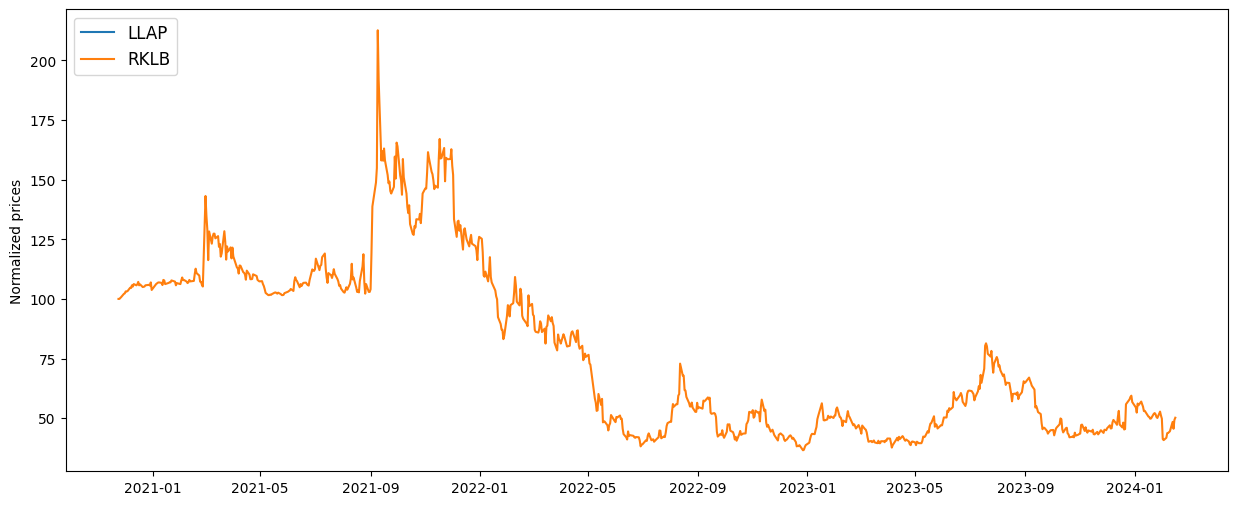

In [51]:
df3 = df1.divide(df1.iloc[0] / 100)
print(df3.head())
plt.figure(figsize=(15, 6))
for i in range(df3.shape[1]):        
    plt.plot(df3.iloc[:,i], label=df3.columns.values[i])
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Normalized prices')
plt.show()

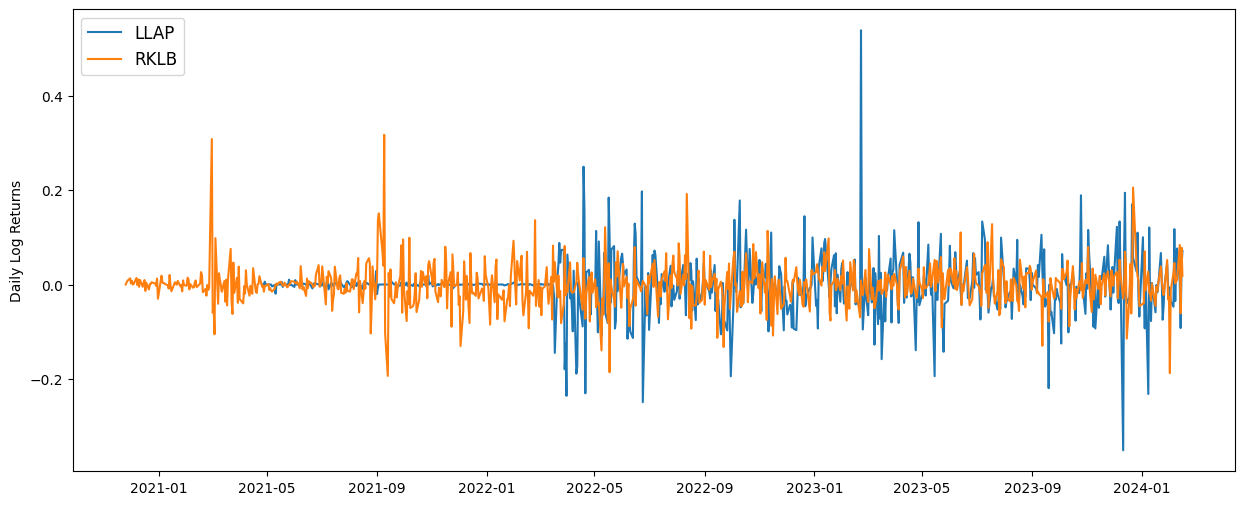

In [46]:
df4 = stock_returns

plt.figure(figsize=(15, 6))
for i in range(df4.shape[1]):
    plt.plot(df4.iloc[:,i], label=df4.columns.values[i])
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Daily Log Returns')
plt.show()

Ticker          LLAP      RKLB
Date                          
2023-06-02  0.007874  0.033755
2023-06-05 -0.007812  0.000000
2023-06-06  0.000000  0.057143
2023-06-07  0.070866 -0.009652
2023-06-08  0.029412  0.029240


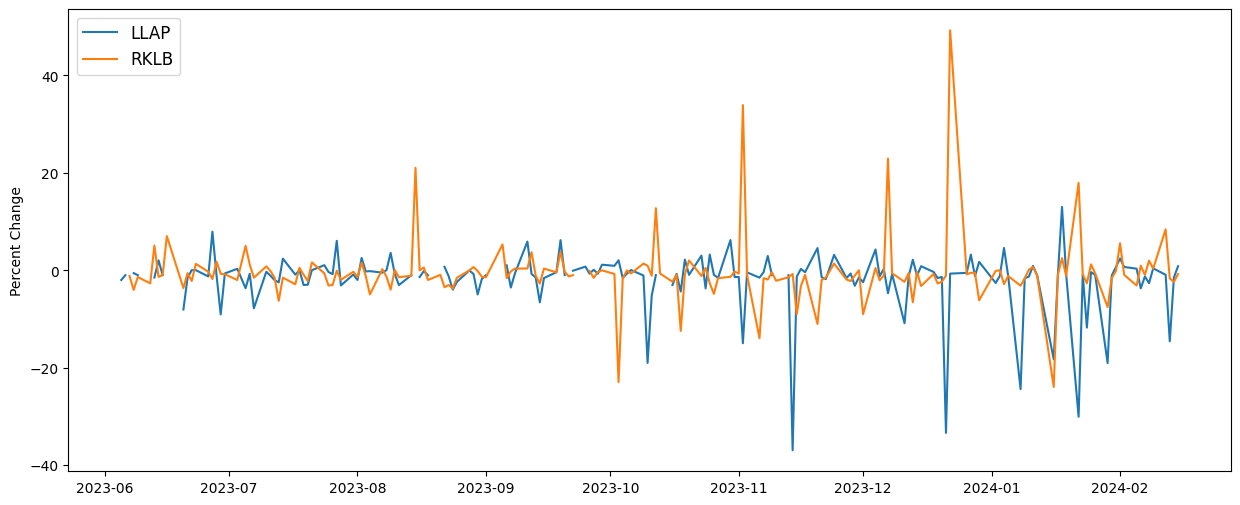

In [58]:
print(df.head())
df5 = df.pct_change()
#print(df5.head())
#print(df5.mean)
plt.figure(figsize=(15, 6))
for i in range(df5.shape[1]):
    plt.plot(df5.iloc[:,i], label = df5.columns.values[i])
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Percent Change')
plt.show()

In [121]:
yearly_returns = np.sum(df4,axis = 0)/df4.shape[0]*252

print(yearly_returns)

Ticker
ANET    0.407948
AXP     0.225865
IR      0.301648
MU      0.157199
NTNX    0.242786
ODFL    0.258491
PCAR    0.251912
WIRE    0.433055
WTS     0.248735
XOM     0.267324
dtype: float64


In [122]:
df4.cov()

Ticker,ANET,AXP,IR,MU,NTNX,ODFL,PCAR,WIRE,WTS,XOM
Ticker,,,,,,,,,,
ANET,0.000634,0.000160,0.000183,0.000275,0.000286,0.000187,0.000117,0.000186,0.000168,0.000070
AXP,0.000160,0.000408,0.000231,0.000218,0.000167,0.000151,0.000152,0.000219,0.000181,0.000191
IR,0.000183,0.000231,0.000358,0.000227,0.000192,0.000189,0.000165,0.000259,0.000215,0.000158
MU,0.000275,0.000218,0.000227,0.000651,0.000291,0.000218,0.000153,0.000246,0.000189,0.000107
NTNX,0.000286,0.000167,0.000192,0.000291,0.001023,0.000204,0.000112,0.000179,0.000167,0.000082
ODFL,0.000187,0.000151,0.000189,0.000218,0.000204,0.000419,0.000131,0.000232,0.000180,0.000061
PCAR,0.000117,0.000152,0.000165,0.000153,0.000112,0.000131,0.000238,0.000172,0.000154,0.000107
WIRE,0.000186,0.000219,0.000259,0.000246,0.000179,0.000232,0.000172,0.000657,0.000250,0.000187
WTS,0.000168,0.000181,0.000215,0.000189,0.000167,0.000180,0.000154,0.000250,0.000322,0.000116


In [123]:
def weighted_returns(returns_x,weight_x):
    return returns_x.dot(weight_x)

def vol(weights_x, covar_x):
    return np.sqrt(np.dot(weights_x,np.dot(weights_x,covar_x)))

def sharpe_ratio_calc(returns_y, volatility_y):
    return returns_y/volatility_y

In [124]:
# All weights, of course, must be between 0 and 1. Thus we set 0 and 1 as the boundaries.
from scipy.optimize import Bounds
bounds = Bounds(0, 1)

# The second boundary is the sum of weights.
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint(np.ones((df4.shape[1],), dtype=int),1,1)

# Find a portfolio with the minimum risk.
from scipy.optimize import minimize
#Create x0, the first guess at the values of each stock's weight.
weights = np.ones(df4.shape[1])
x0 = weights/np.sum(weights)
#Define a function to calculate volatility
covar_portfolio = df4.cov()
fun1 = lambda w: np.sqrt(np.dot(w,np.dot(w,covar_portfolio)))
res = minimize(fun1,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)

#These are the weights of the stocks in the portfolio with the lowest level of risk possible.
w_min = res.x

np.set_printoptions(suppress = True, precision=2)
print(w_min)
print('return: % .2f'% (weighted_returns(yearly_returns,w_min)*100), 'risk: % .3f'% vol(w_min,covar_portfolio))

[0.08 0.02 0.   0.   0.03 0.14 0.4  0.   0.11 0.23]
return:  26.76 risk:  0.013


In [125]:
#Define 1/Sharpe_ratio
fun2 = lambda w: np.sqrt(np.dot(w,np.dot(w,covar_portfolio)))/yearly_returns.dot(w)
res_sharpe = minimize(fun2,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)

#These are the weights of the stocks in the portfolio with the highest Sharpe ratio.
w_sharpe = res_sharpe.x
print(w_sharpe)
print('return: % .2f'% (weighted_returns(yearly_returns,w_sharpe)*100), 'risk: % .3f'% vol(w_sharpe,covar_portfolio))

[0.26 0.   0.03 0.   0.   0.04 0.28 0.19 0.   0.19]
return:  33.26 risk:  0.015


In [128]:
stock_list

['IR', 'WTS', 'WIRE', 'PCAR', 'ANET', 'AXP', 'ODFL', 'NTNX', 'XOM', 'MU']

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarnin

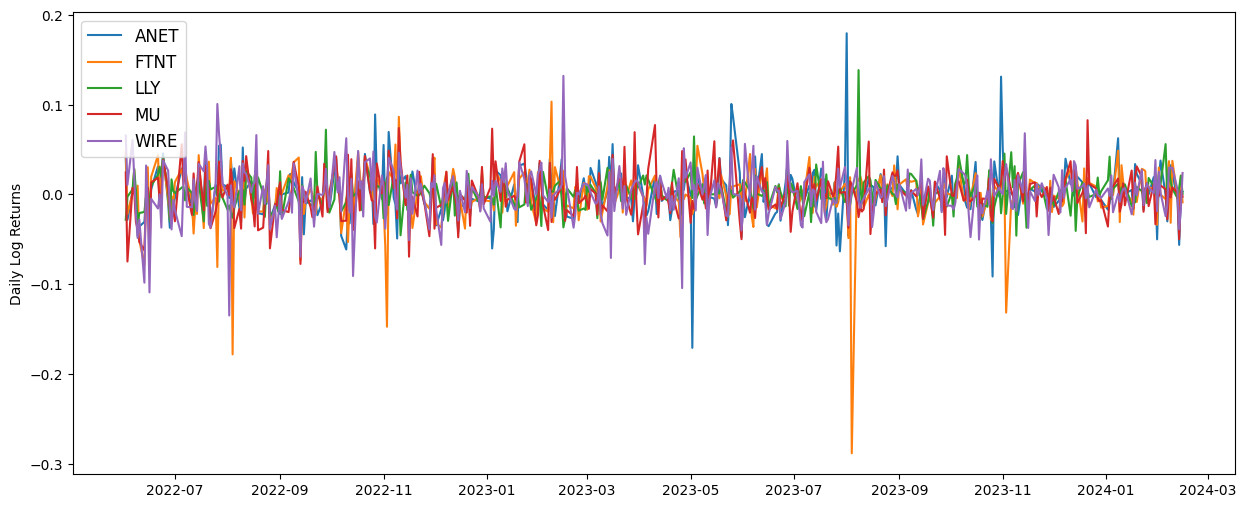

In [136]:
stock_list = ['ANET', 'LLY', 'MU', 'WIRE', 'FTNT']

df = yf.download(stock_list,
start='2022-06-01',
end='2024-02-16',
progress = False)

stock_returns = np.log(df['Adj Close']/df['Adj Close'].shift(1))
stock_returns.head()

df4 = stock_returns
yearly_returns = np.sum(df4,axis = 0)/df4.shape[0]*252

plt.figure(figsize=(15, 6))
for i in range(df4.shape[1]):
    plt.plot(df4.iloc[:,i], label=df4.columns.values[i])
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Daily Log Returns')
plt.show()

In [137]:
# All weights, of course, must be between 0 and 1. Thus we set 0 and 1 as the boundaries.
from scipy.optimize import Bounds
bounds = Bounds(0, 1)

# The second boundary is the sum of weights.
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint(np.ones((df4.shape[1],), dtype=int),1,1)

# Find a portfolio with the minimum risk.
from scipy.optimize import minimize
#Create x0, the first guess at the values of each stock's weight.
weights = np.ones(df4.shape[1])
x0 = weights/np.sum(weights)
#Define a function to calculate volatility
covar_portfolio = df4.cov()
fun1 = lambda w: np.sqrt(np.dot(w,np.dot(w,covar_portfolio)))
res = minimize(fun1,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)

#These are the weights of the stocks in the portfolio with the lowest level of risk possible.
w_min = res.x

np.set_printoptions(suppress = True, precision=2)
print(w_min)
print('return: % .2f'% (weighted_returns(yearly_returns,w_min)*100), 'risk: % .3f'% vol(w_min,covar_portfolio))

#Define 1/Sharpe_ratio
fun2 = lambda w: np.sqrt(np.dot(w,np.dot(w,covar_portfolio)))/yearly_returns.dot(w)
res_sharpe = minimize(fun2,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)

#These are the weights of the stocks in the portfolio with the highest Sharpe ratio.
w_sharpe = res_sharpe.x
print(w_sharpe)
print('return: % .2f'% (weighted_returns(yearly_returns,w_sharpe)*100), 'risk: % .3f'% vol(w_sharpe,covar_portfolio))

[0.09 0.07 0.55 0.17 0.13]
return:  41.06 risk:  0.014
[0.23 0.   0.66 0.   0.11]
return:  52.29 risk:  0.015


In [138]:
covar_portfolio

Ticker,ANET,FTNT,LLY,MU,WIRE
Ticker,,,,,
ANET,0.000733,0.000275,0.000052,0.000265,0.000202
FTNT,0.000275,0.000834,0.000085,0.000214,0.000176
LLY,0.000052,0.000085,0.000304,0.000030,0.000035
MU,0.000265,0.000214,0.000030,0.000593,0.000243
WIRE,0.000202,0.000176,0.000035,0.000243,0.000753


/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarnin

Ticker          ANET      FTNT       LLY        MU      WIRE
Date                                                        
2022-06-01       NaN       NaN       NaN       NaN       NaN
2022-06-02  0.043966  0.048986 -0.027806  0.024745  0.067835
2022-06-03 -0.027982 -0.021700 -0.002579 -0.072045  0.010712
2022-06-06  0.003296  0.001112  0.005669  0.007292  0.062556
2022-06-07  0.007632  0.028319  0.028811  0.004400  0.018624


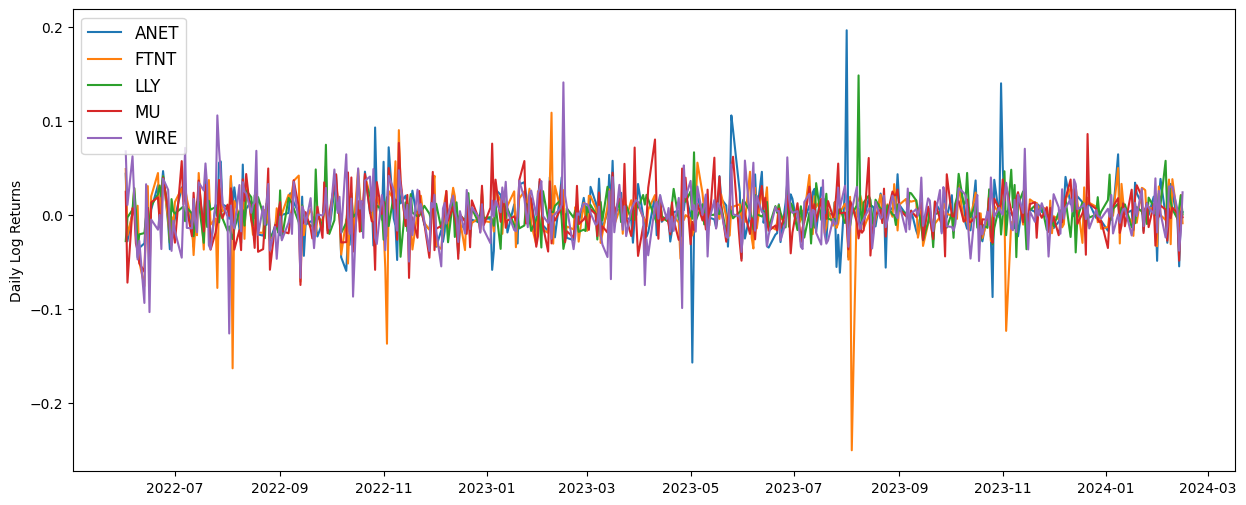

[0.09 0.08 0.54 0.17 0.13]
return:  46.86 risk:  0.014
[0.24 0.   0.62 0.   0.14]
return:  58.00 risk:  0.015


In [157]:
stock_list = ['ANET', 'LLY', 'MU', 'WIRE', 'FTNT']

df = yf.download(stock_list,
start='2022-06-01',
end='2024-02-16',
progress = False)

stock_returns = df['Adj Close'].pct_change()
print(stock_returns.head())

df4 = stock_returns.dropna()
yearly_returns = np.mean(df4,axis=0)*252

plt.figure(figsize=(15, 6))
for i in range(df4.shape[1]):
    plt.plot(df4.iloc[:,i], label=df4.columns.values[i])
plt.legend(loc='upper left', fontsize=12)
plt.ylabel('Daily Log Returns')
plt.show()

# All weights, of course, must be between 0 and 1. Thus we set 0 and 1 as the boundaries.
from scipy.optimize import Bounds
bounds = Bounds(0, 1)

# The second boundary is the sum of weights.
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint(np.ones((df4.shape[1],), dtype=int),1,1)

# Find a portfolio with the minimum risk.
from scipy.optimize import minimize
#Create x0, the first guess at the values of each stock's weight.
weights = np.ones(df4.shape[1])
x0 = weights/np.sum(weights)
#Define a function to calculate volatility
covar_portfolio = df4.cov()
fun1 = lambda w: np.sqrt(np.dot(w,np.dot(w,covar_portfolio)))
res = minimize(fun1,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)

#These are the weights of the stocks in the portfolio with the lowest level of risk possible.
w_min = res.x

np.set_printoptions(suppress = True, precision=2)
print(w_min)
print('return: % .2f'% (weighted_returns(yearly_returns,w_min)*100), 'risk: % .3f'% vol(w_min,covar_portfolio))

#Define 1/Sharpe_ratio
fun2 = lambda w: np.sqrt(np.dot(w,np.dot(w,covar_portfolio)))/yearly_returns.dot(w)
res_sharpe = minimize(fun2,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)

#These are the weights of the stocks in the portfolio with the highest Sharpe ratio.
w_sharpe = res_sharpe.x
print(w_sharpe)
print('return: % .2f'% (weighted_returns(yearly_returns,w_sharpe)*100), 'risk: % .3f'% vol(w_sharpe,covar_portfolio))

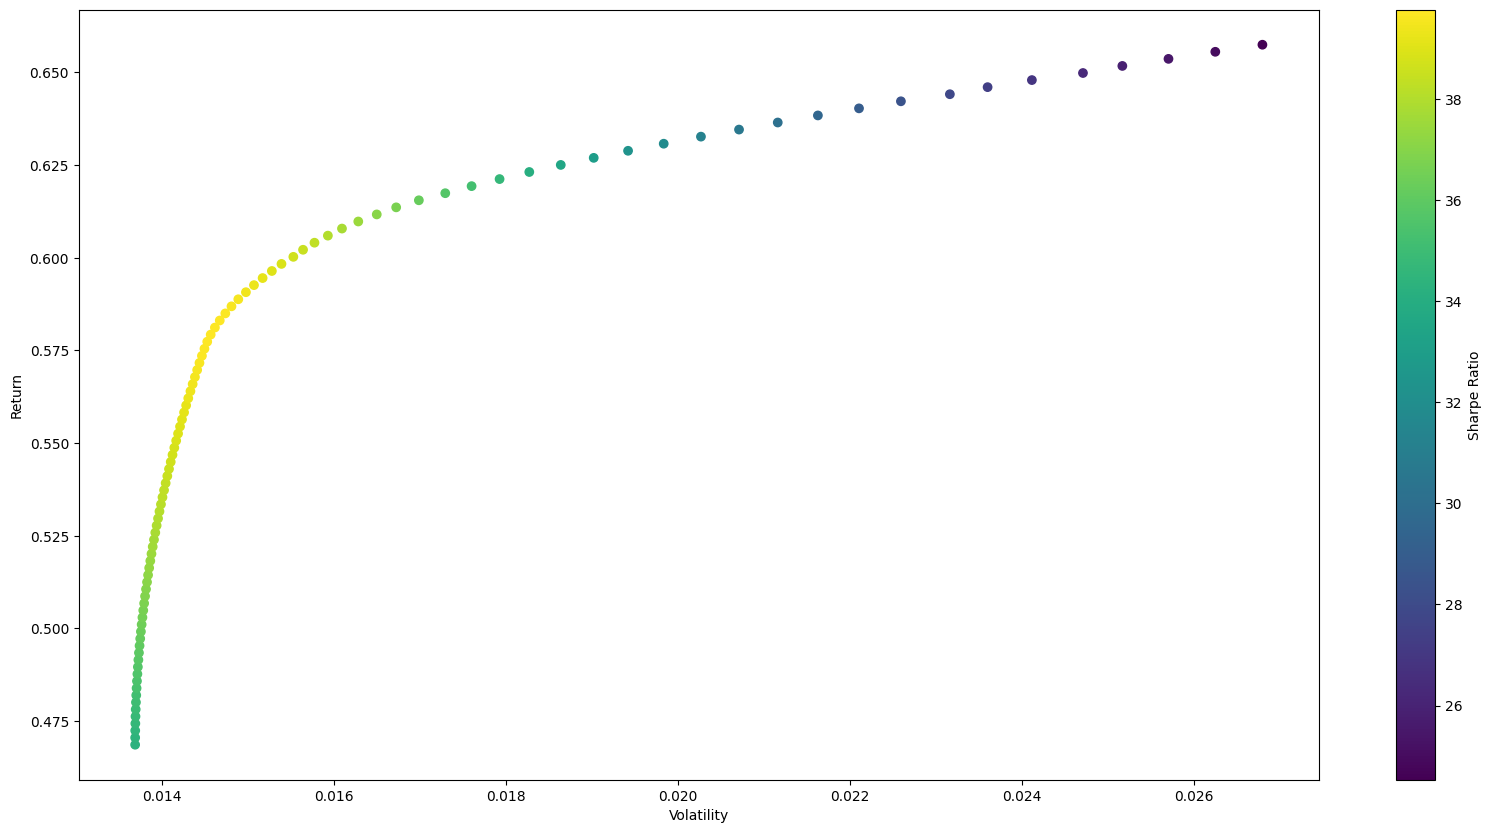

In [158]:
w = w_min
num_ports = 100
gap = (np.amax(yearly_returns) - weighted_returns(yearly_returns, w_min))/num_ports


all_weights = np.zeros((num_ports, len(df4.columns)))
all_weights[0],all_weights[1]=w_min,w_sharpe
ret_arr = np.zeros(num_ports)
ret_arr[0],ret_arr[1]=weighted_returns(yearly_returns,w_min),weighted_returns(yearly_returns,w_sharpe)
vol_arr = np.zeros(num_ports)
vol_arr[0],vol_arr[1]=vol(w_min,covar_portfolio),vol(w_sharpe,covar_portfolio)

for i in range(num_ports):
    port_ret = weighted_returns(yearly_returns,w) + i*gap
    double_constraint = LinearConstraint([np.ones(df4.shape[1]),yearly_returns],[1,port_ret],[1,port_ret])
    
    #Create x0: initial guesses for weights.
    x0 = w_min
    #Define a function for portfolio volatility.
    fun = lambda w: np.sqrt(np.dot(w,np.dot(w,covar_portfolio)))
    a = minimize(fun,x0,method='trust-constr',constraints = double_constraint,bounds = bounds)
    
    all_weights[i,:]=a.x
    ret_arr[i]=port_ret
    vol_arr[i]=vol(a.x,covar_portfolio)
    
sharpe_arr = ret_arr/vol_arr  

plt.figure(figsize=(20,10))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

In [159]:
stock_list = ['ANET', 'LLY', 'MU', 'WIRE', 'FTNT']

df = yf.download(stock_list,
start='2022-06-01',
end='2024-02-16',
progress = False)

stock_returns = df['Adj Close'].pct_change()
print(stock_returns.head())

Ticker          ANET      FTNT       LLY        MU      WIRE
Date                                                        
2022-06-01       NaN       NaN       NaN       NaN       NaN
2022-06-02  0.043966  0.048986 -0.027806  0.024745  0.067835
2022-06-03 -0.027982 -0.021700 -0.002579 -0.072045  0.010712
2022-06-06  0.003296  0.001112  0.005669  0.007292  0.062556
2022-06-07  0.007632  0.028319  0.028811  0.004400  0.018624


/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarnin

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


Ticker          LLAP      RKLB
Date                          
2023-06-01       NaN       NaN
2023-06-02  0.007874  0.033755
2023-06-05 -0.007812  0.000000
2023-06-06  0.000000  0.057143
2023-06-07  0.070866 -0.009652
[0.25 0.75]
return:  23.99 risk:  0.041
[0. 1.]
return:  28.31 risk:  0.044


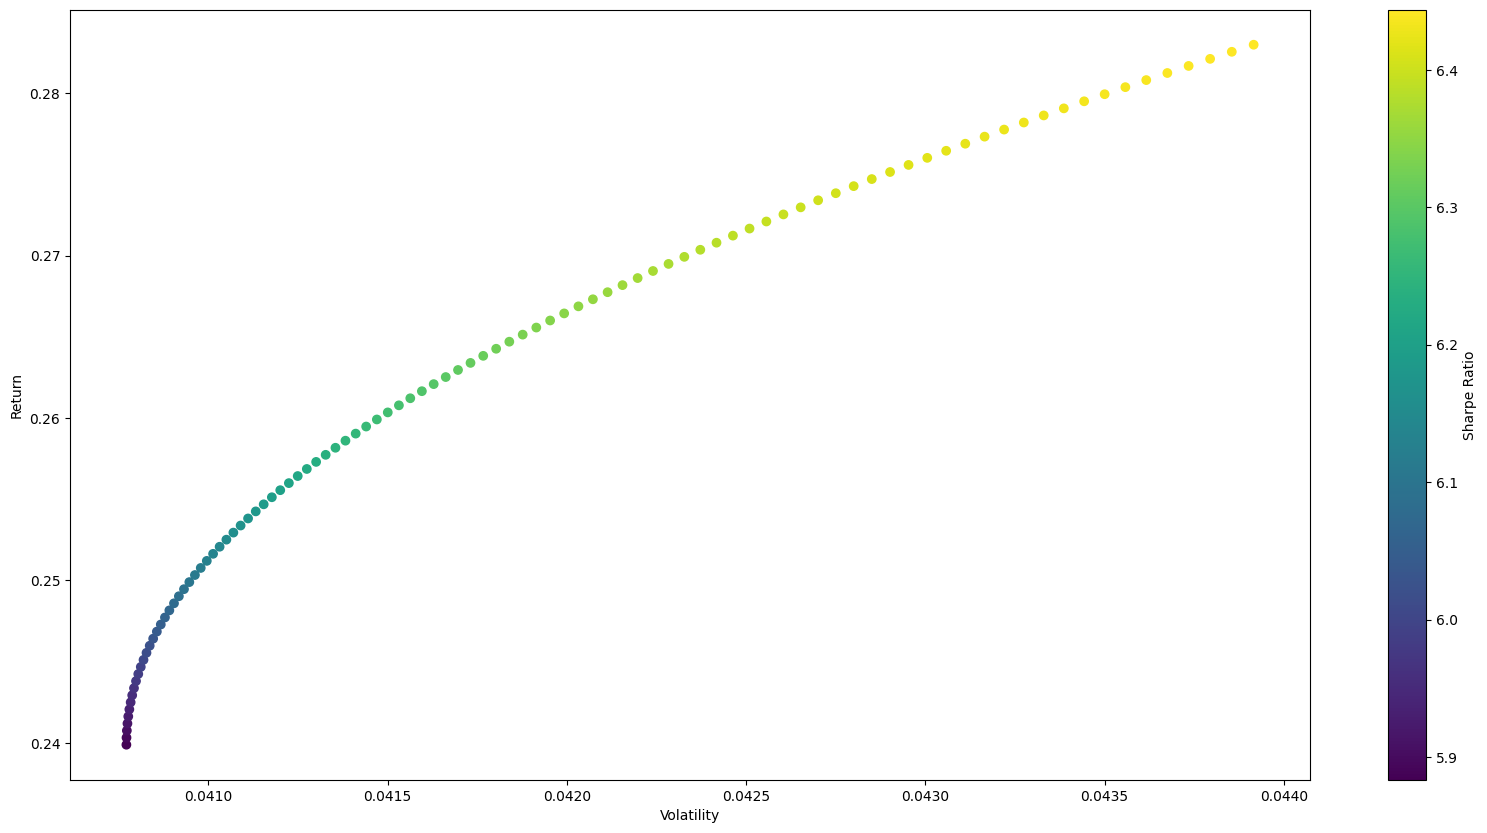

In [49]:
df0 = yf.download(['LLAP', 'RKLB'], start='2023-06-01',end='2024-02-16', progress = False)
df2 = df0['Adj Close'].pct_change()
print(df2.head())

#df0 = pd.read_csv(r'stocks.csv',header = 0)
#df1 = df0.set_index('Date')
#df1.head()

#Calculate daily changes in the stocks' value
#df2 = df1.pct_change()
#Remove nan values at the first row of df2. Create a new dataframe df
df = df2.dropna()
# Calculate annualized average return for each stock. Annualized average return = Daily average return * 252 business days.
r = np.mean(df,axis=0)*252

# Create a covariance matrix
covar = df.cov()

#Define frequently used functions.
# r is each stock's return, w is the portion of each stock in our portfolio, and covar is the covariance matrix
# Rate of return
def ret(r,w):
    return r.dot(w)
# Risk level - or volatility
def vol(w,covar):
    return np.sqrt(np.dot(w,np.dot(w,covar)))
def sharpe (ret,vol):
    return ret/vol


# All weights, of course, must be between 0 and 1. Thus we set 0 and 1 as the boundaries.
from scipy.optimize import Bounds
bounds = Bounds(0, 1)

# The second boundary is the sum of weights.
from scipy.optimize import LinearConstraint
linear_constraint = LinearConstraint(np.ones((df2.shape[1],), dtype=int),1,1)

# Find a portfolio with the minimum risk.
from scipy.optimize import minimize
#Create x0, the first guess at the values of each stock's weight.
weights = np.ones(df2.shape[1])
x0 = weights/np.sum(weights)
#Define a function to calculate volatility
fun1 = lambda w: np.sqrt(np.dot(w,np.dot(w,covar)))
res = minimize(fun1,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)

#These are the weights of the stocks in the portfolio with the lowest level of risk possible.
w_min = res.x

np.set_printoptions(suppress = True, precision=2)
print(w_min)
print('return: % .2f'% (ret(r,w_min)*100), 'risk: % .3f'% vol(w_min,covar))



#Define 1/Sharpe_ratio
fun2 = lambda w: np.sqrt(np.dot(w,np.dot(w,covar)))/r.dot(w)
res_sharpe = minimize(fun2,x0,method='trust-constr',constraints = linear_constraint,bounds = bounds)

#These are the weights of the stocks in the portfolio with the highest Sharpe ratio.
w_sharpe = res_sharpe.x
print(w_sharpe)
print('return: % .2f'% (ret(r,w_sharpe)*100), 'risk: % .3f'% vol(w_sharpe,covar))

w = w_min
num_ports = 100
gap = (np.amax(r) - ret(r,w_min))/num_ports


all_weights = np.zeros((num_ports, len(df.columns)))
all_weights[0],all_weights[1]=w_min,w_sharpe
ret_arr = np.zeros(num_ports)
ret_arr[0],ret_arr[1]=ret(r,w_min),ret(r,w_sharpe)
vol_arr = np.zeros(num_ports)
vol_arr[0],vol_arr[1]=vol(w_min,covar),vol(w_sharpe,covar)

for i in range(num_ports):
    port_ret = ret(r,w) + i*gap
    double_constraint = LinearConstraint([np.ones(df2.shape[1]),r],[1,port_ret],[1,port_ret])
    
    #Create x0: initial guesses for weights.
    x0 = w_min
    #Define a function for portfolio volatility.
    fun = lambda w: np.sqrt(np.dot(w,np.dot(w,covar)))
    a = minimize(fun,x0,method='trust-constr',constraints = double_constraint,bounds = bounds)
    
    all_weights[i,:]=a.x
    ret_arr[i]=port_ret
    vol_arr[i]=vol(a.x,covar)
    
sharpe_arr = ret_arr/vol_arr  

plt.figure(figsize=(20,10))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

In [50]:
df.head()

Ticker,LLAP,RKLB
Date,,
2023-06-02,0.007874,0.033755
2023-06-05,-0.007812,0.000000
2023-06-06,0.000000,0.057143
2023-06-07,0.070866,-0.009652
2023-06-08,0.029412,0.029240


In [163]:
np.amax(r)

0.659379546281695

In [164]:
df_new = pd.read_csv('stocks.csv')
df_new.head()

,Date,ANET,AXP,IR,ODFL,PCAR,WIRE,WTS
0,2020-06-01,58.660000,91.932190,28.666737,165.687668,42.436611,47.757080,80.070244
1,2020-06-02,57.612499,94.136658,28.756439,163.446899,42.616524,49.092800,81.549973
2,2020-06-03,57.817501,100.151451,30.690149,164.355087,43.312965,49.820473,84.090790
3,2020-06-04,57.165001,101.234695,30.580509,163.802277,43.928154,50.797344,84.071335
4,2020-06-05,58.792500,104.265846,33.132206,167.444733,45.239788,52.661385,88.714912


In [165]:
np.log(df_new['ANET']/df_new['ANET'].shift(1))

0           NaN
1     -0.018019
2      0.003552
3     -0.011350
4      0.028072
         ...   
930    0.023499
931   -0.005574
932   -0.056275
933    0.000602
934    0.003119
Name: ANET, Length: 935, dtype: float64

In [183]:
df = yf.download(['WIRE','IR','PCAR'], start='2023-06-01',end='2024-02-16', progress = False)
df['Adj Close'].pct_change().head()

/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
/home/hkuser/Documents/code_venv/main_env/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')


Ticker,IR,PCAR,WIRE
Date,,,
2023-06-01,NaN,NaN,NaN
2023-06-02,0.055202,0.046844,0.057984
2023-06-05,-0.011082,0.000409,-0.004342
2023-06-06,0.013349,0.017183,0.027169
2023-06-07,0.019515,0.021450,0.055712
